In [156]:
from IPython.display import display, HTML

display(
    HTML("""
<style>
* {font-family:D2Coding;}
div.container{width:78% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input { font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:3px;}
table.dataframe{font-size:12px;}
</style>
"""))

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프를 더 높은 해상도로 그려줌
%config InlineBackend.figure_format = 'retina'

# 한글설정
# plt.rc 는 환경설정
plt.rc('font', family='AppleGothic') # Mac
plt.rc('axes', unicode_minus=False) # 축의 - 꺠짐 방지
# plt.rc('font', family='AppleGothic')
# plt.rc('font', family='Malgun Gothic') # 윈도우즈
# plt.rcParams['font.family'] = "AppleGothic" 

# warning (경고) 안보이게

<b><font size="5" color="red">ch12_데이터시각화_2절_Seaborn</font></b>

- 시각화 라이브러리 : matplotlib, seaborn (데이터시각화), folium (지도시각화)
    * matplotlib : 파이썬에서 가장 쉽세 많이 사용하는 시각화 라이브러리, 판다스 내부에 포함
    * seaborn : matplotlib기반으로 다양한 색, 테마, 챠트기능과 groupby 기능 포함된 라이브러리
    
# 2절 seaborn

- matplotlib을 기반으로 만든 고수준 그래픽 라이브러리
    * [공식사이트] https://seaborn.pydata.org
    * [seaborn API] https://seaborn.pydata.org/api.html


- seaborn 으로 그래프 그리기 위해 다음 단계 따릅니다.
    1. 데이터 준비
    2. 미적 속성 설정 (한글설정을 다시)
    3. 함수를 이용해서 그래프 그리기 (수치형, 범주형, 쌍관계, 밀도, 회귀, 다중)
    4. 그래프 출력(show), 저장(savefig)

In [6]:
sns.__version__

'0.12.2'

## 2.1. 데이터 준비하기

- iris, titanic

In [28]:
iris = sns.load_dataset('iris')
iris.shape
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [10]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
iris.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [28]:
iris.species.unique() # 범주형 데이터들의 종류

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [36]:
iris['species'].value_counts() # 범주별 데이터 갯수
# iris.groupby('species')['sepal_length'].count()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [29]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [27]:
titanic.shape

(891, 15)

In [37]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [39]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

## 2.2. 미적속성 설정하기 (style, context, palette, figsize...) 

### 1) 그래프 style 설정

- [교안 51page] https://seaborn.pydata.org/generated/seaborn.axes_style.html#seaborn.axes_style

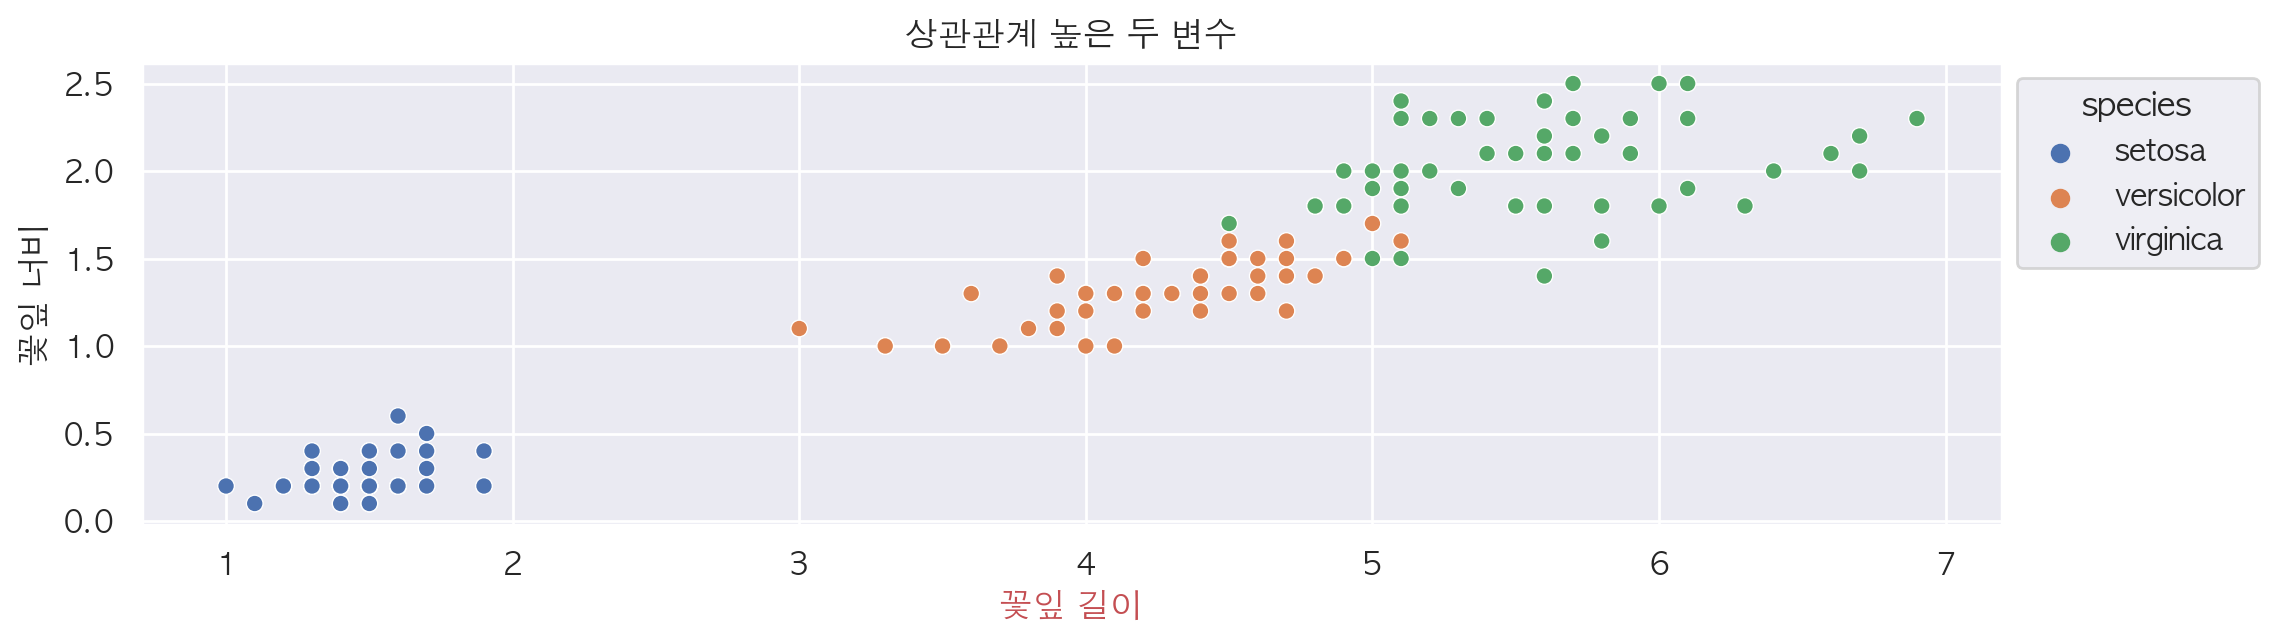

In [21]:
plt.figure(figsize=(12, 3))
sns.set(style='darkgrid')  # white, whitegrid, dark, darkgrid, ticks
plt.rc('font', family='AppleGothic')  # Mac
plt.rc('axes', unicode_minus=False)  # 축의 - 꺠짐 방지

ax = sns.scatterplot(data=iris,
                     x='petal_length',
                     y='petal_width',
                     hue='species')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

ax.set(title="상관관계 높은 두 변수", ylabel='꽃잎 너비')
ax.set_xlabel('꽃잎 길이', color='r')

plt.show()

### 2) 컨텍스트 지정(비율)

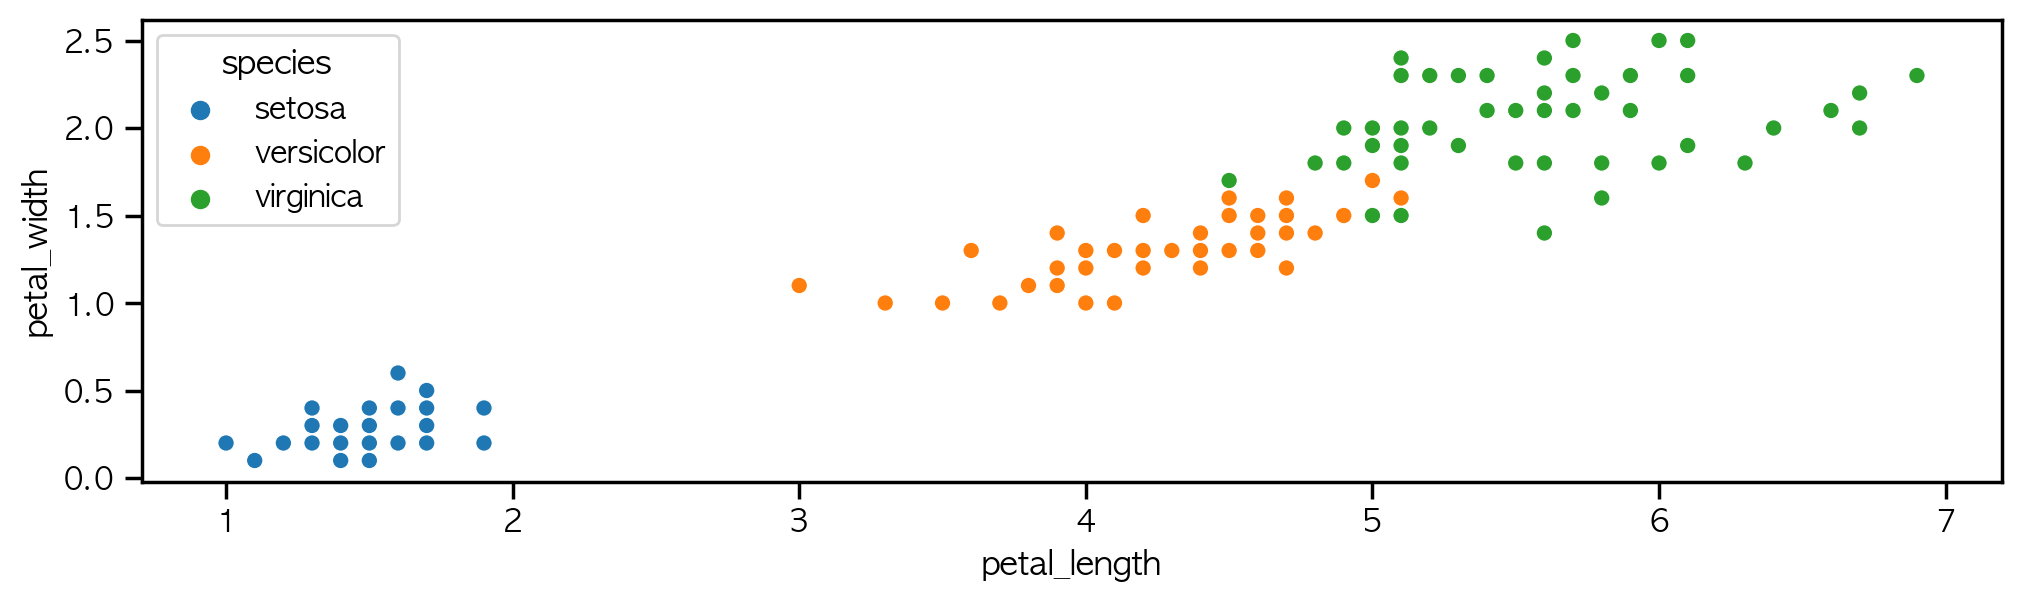

In [7]:
plt.figure(figsize=(12, 3))
# sns.set(context='notebook')  # 배율 : notebook(1,0), paper(0.8), talk(1.3), poster(1.8)
sns.set_context("notebook")
plt.rc('font', family='AppleGothic')  # Mac
plt.rc('axes', unicode_minus=False)  # 축의 - 꺠짐 방지

ax = sns.scatterplot(data=iris,
                     x='petal_length',
                     y='petal_width',
                     hue='species')
plt.show()

### 3) 컬러 팔레트

- [color palettes #1] https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette 
- [color palettes #2] https://matplotlib.org/tutorials/colors/colormaps.html 
- [color palettes #3] https://seaborn.pydata.org/tutorial/color_palettes.html

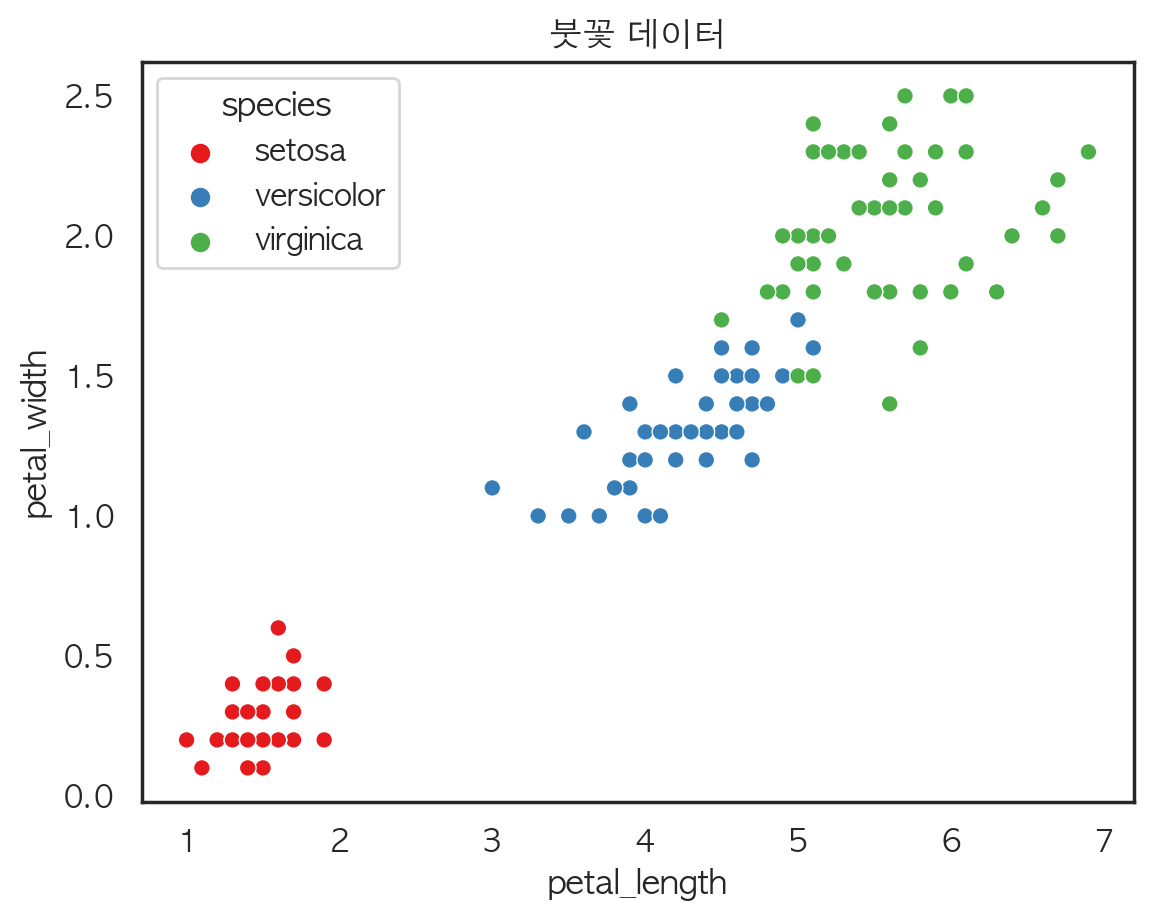

In [8]:
sns.set(palette="Pastel1", style='white', context='notebook')  # 기본 미적 속성 설정
plt.rc('font', family='AppleGothic')  # Mac
plt.rc('axes', unicode_minus=False)  # 축의 - 꺠짐 방지

ax = sns.scatterplot(
    data=iris,
    x='petal_length',
    y='petal_width',
    hue='species',
    palette='Set1',
)
ax.set_title('붓꽃 데이터')
plt.show()

In [9]:
sns.set(palette="Dark2",
        style='whitegrid',
        context='notebook',
        rc={'figure.figsize': (10, 3)})  # 기본 미적 속성 설정
plt.rc('font', family='AppleGothic')  # Mac
plt.rc('axes', unicode_minus=False)  # 축의 - 꺠짐 방지


# 2.3. seaborn 함수로 그래프 그리기

### 1)관계형 그래프
- x축이 수치형 데이터
  ex)  scatterplot, lineplot => relplot(서브플롯)

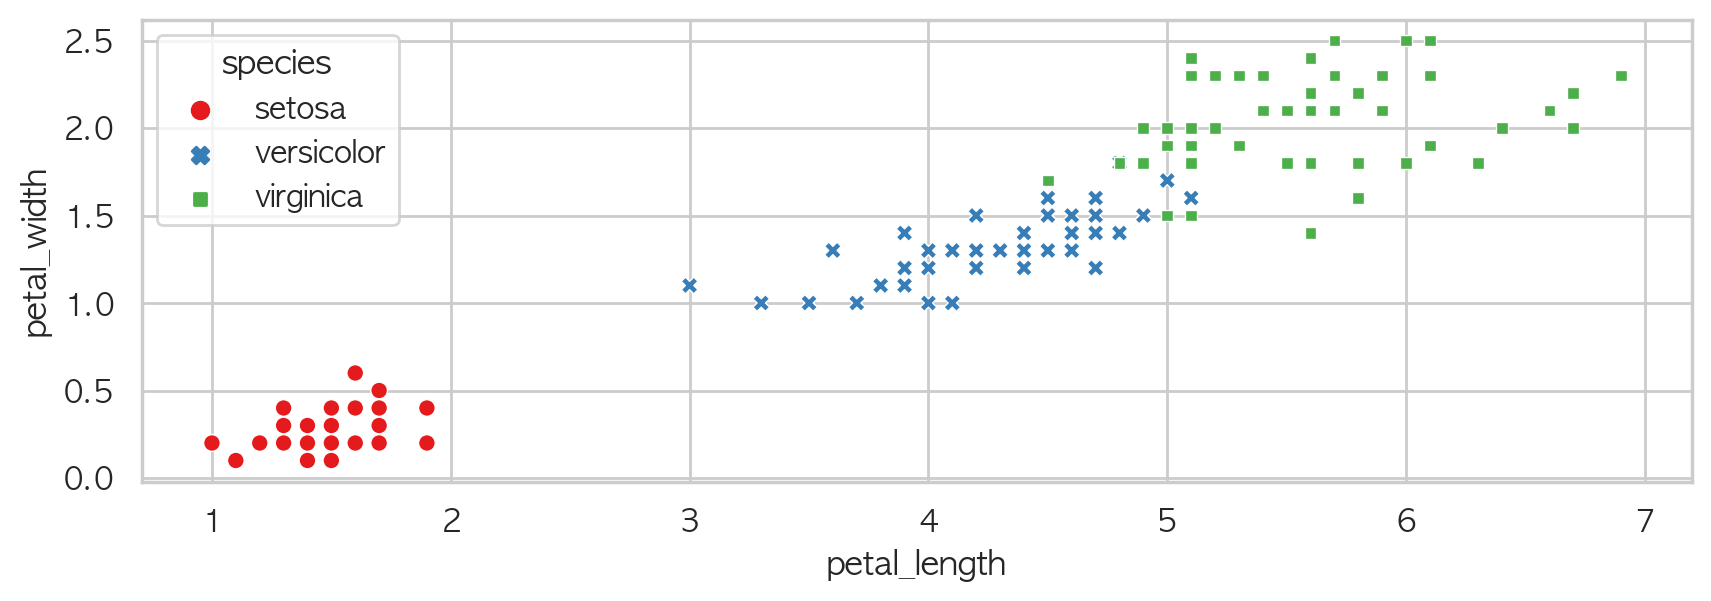

In [10]:
#scatterplot

sns.scatterplot(data=iris,
                x='petal_length',
                y='petal_width',
                hue='species',
                palette='Set1',
                style='species')
# species 별 색생과 스타일이 다른 scatterplot

plt.show()

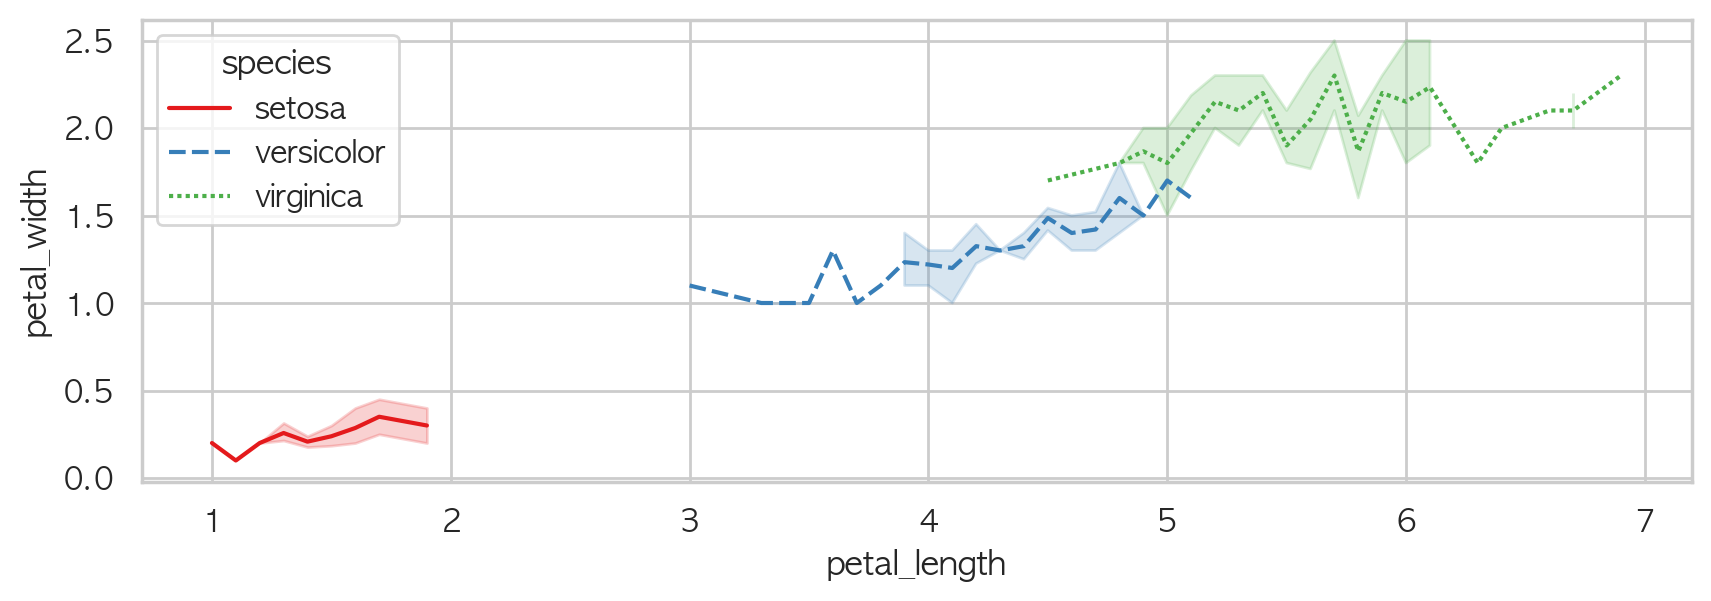

In [11]:
# 종별 lineplot
# lineplot 의 음영 : 95% 신뢰구간

sns.lineplot(data=iris,
             x='petal_length',
             y='petal_width',
             hue='species',
             palette='Set1',
             style='species'
            )

plt.show()

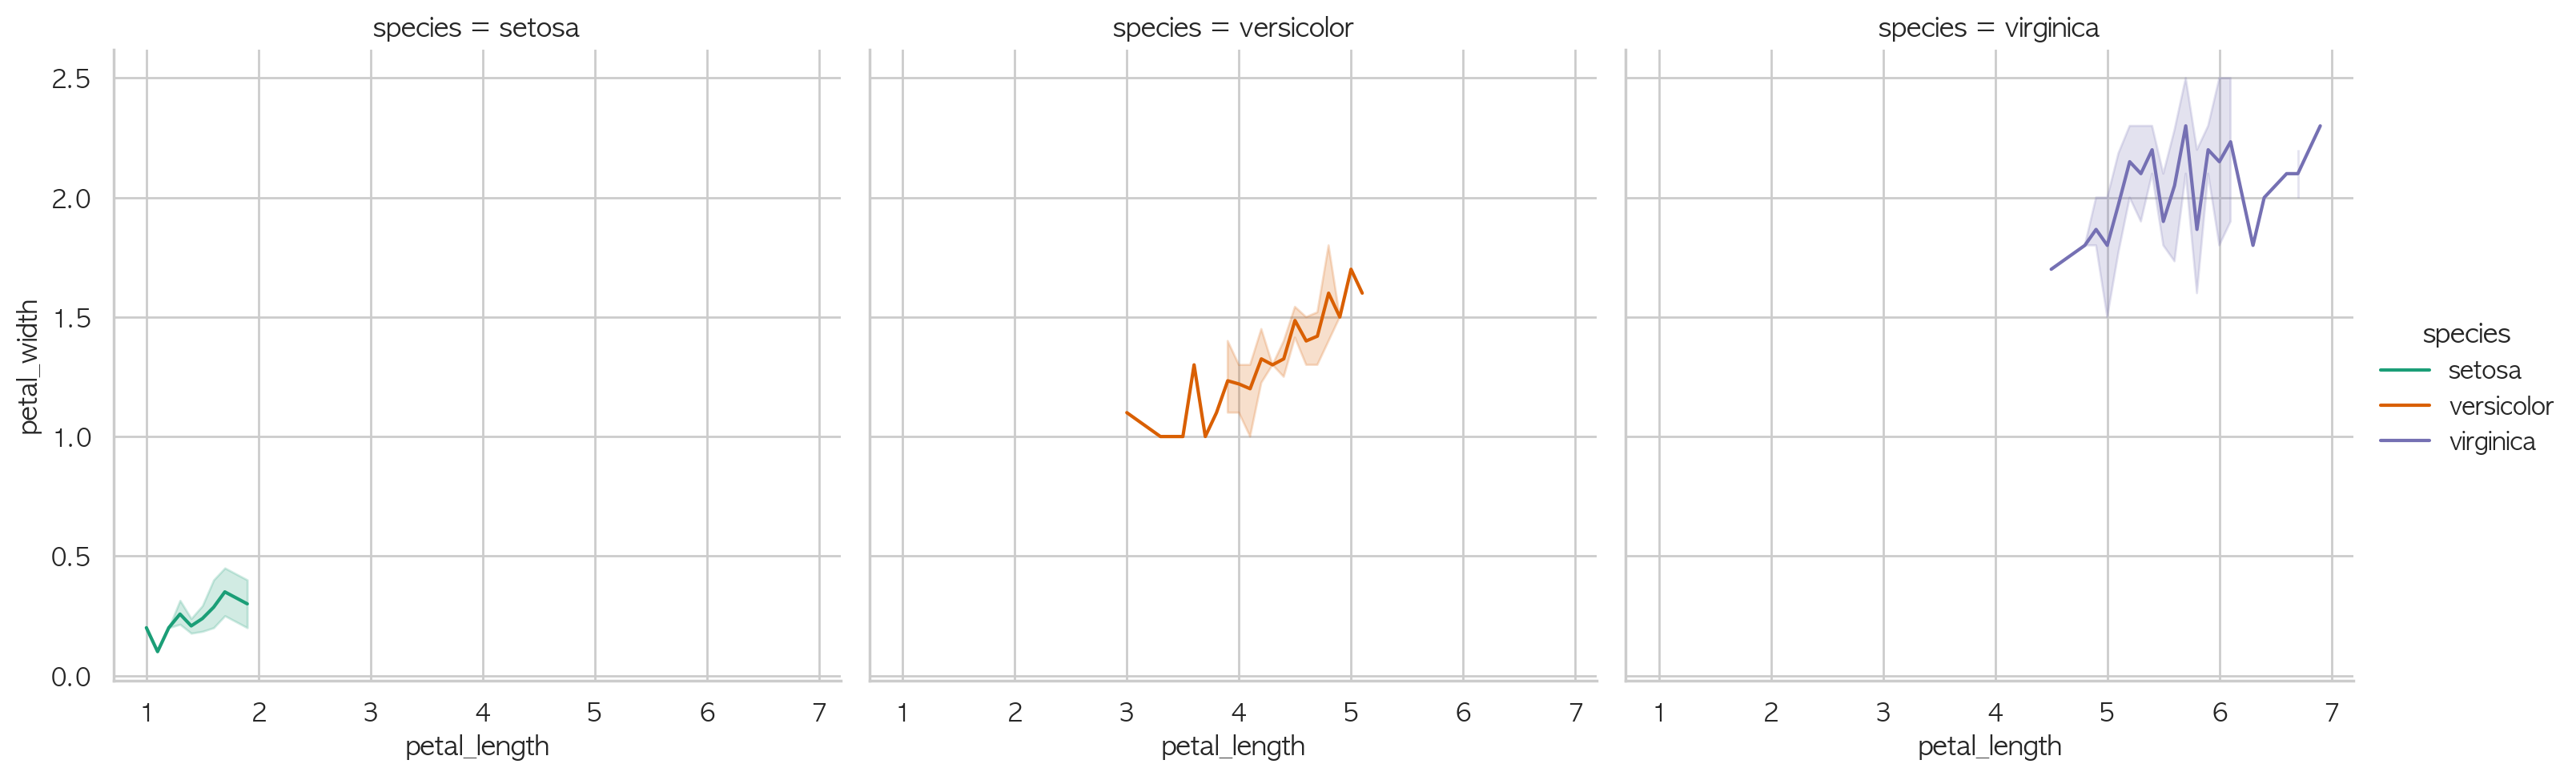

In [13]:
# 종별 lineplot을 서브플롯으로
sns.relplot(data=iris,
            x='petal_length',
            y='petal_width',
            hue='species',
            kind='line', # kind='scatter'
            col='species', # species 별 서브플롯
            # col_wrap = 2, # 한줄에 표현될 서브플롯 수
           )
plt.show()

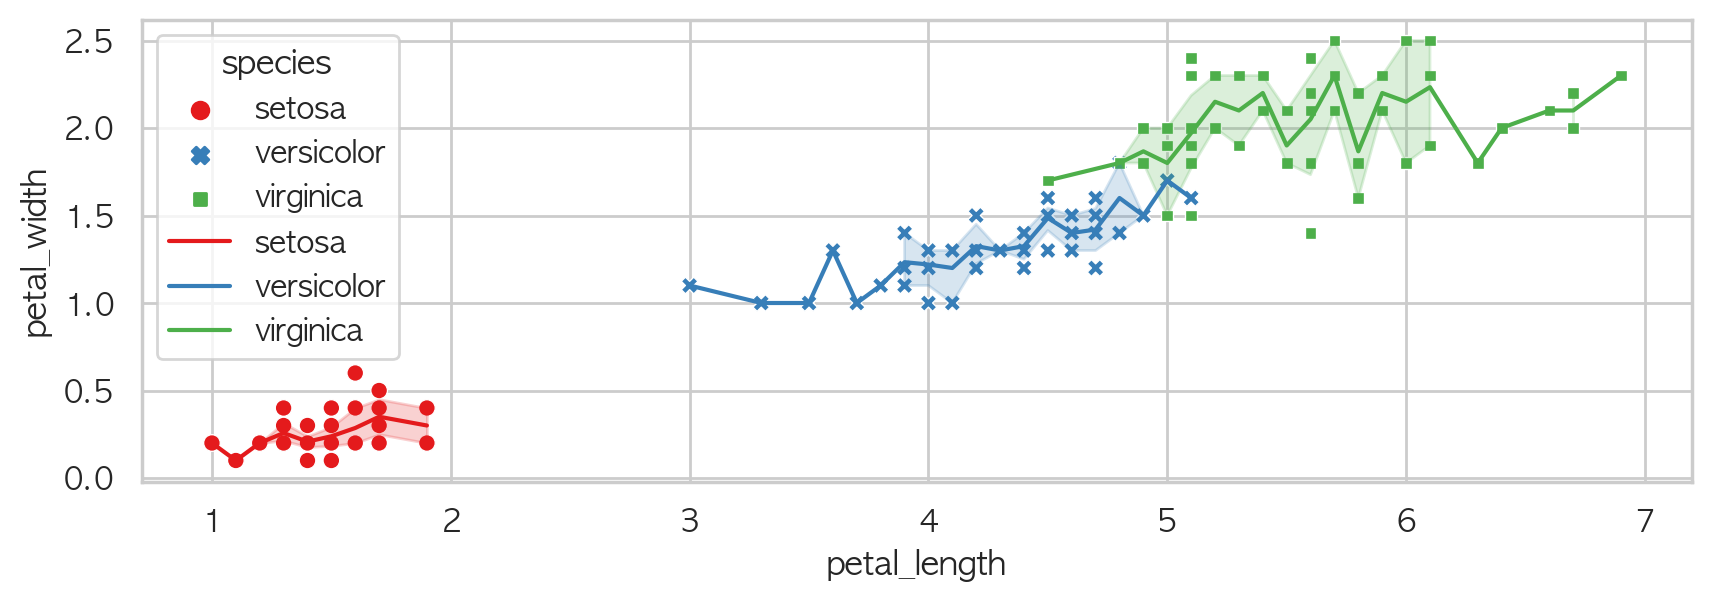

In [14]:
# scatter와 line을 겹쳐서

sns.scatterplot(data=iris,
                x='petal_length',
                y='petal_width',
                hue='species',
                palette='Set1',
                style='species')

sns.lineplot(data=iris,
             x='petal_length',
             y='petal_width',
             hue='species',
             palette='Set1',
            )

plt.show()

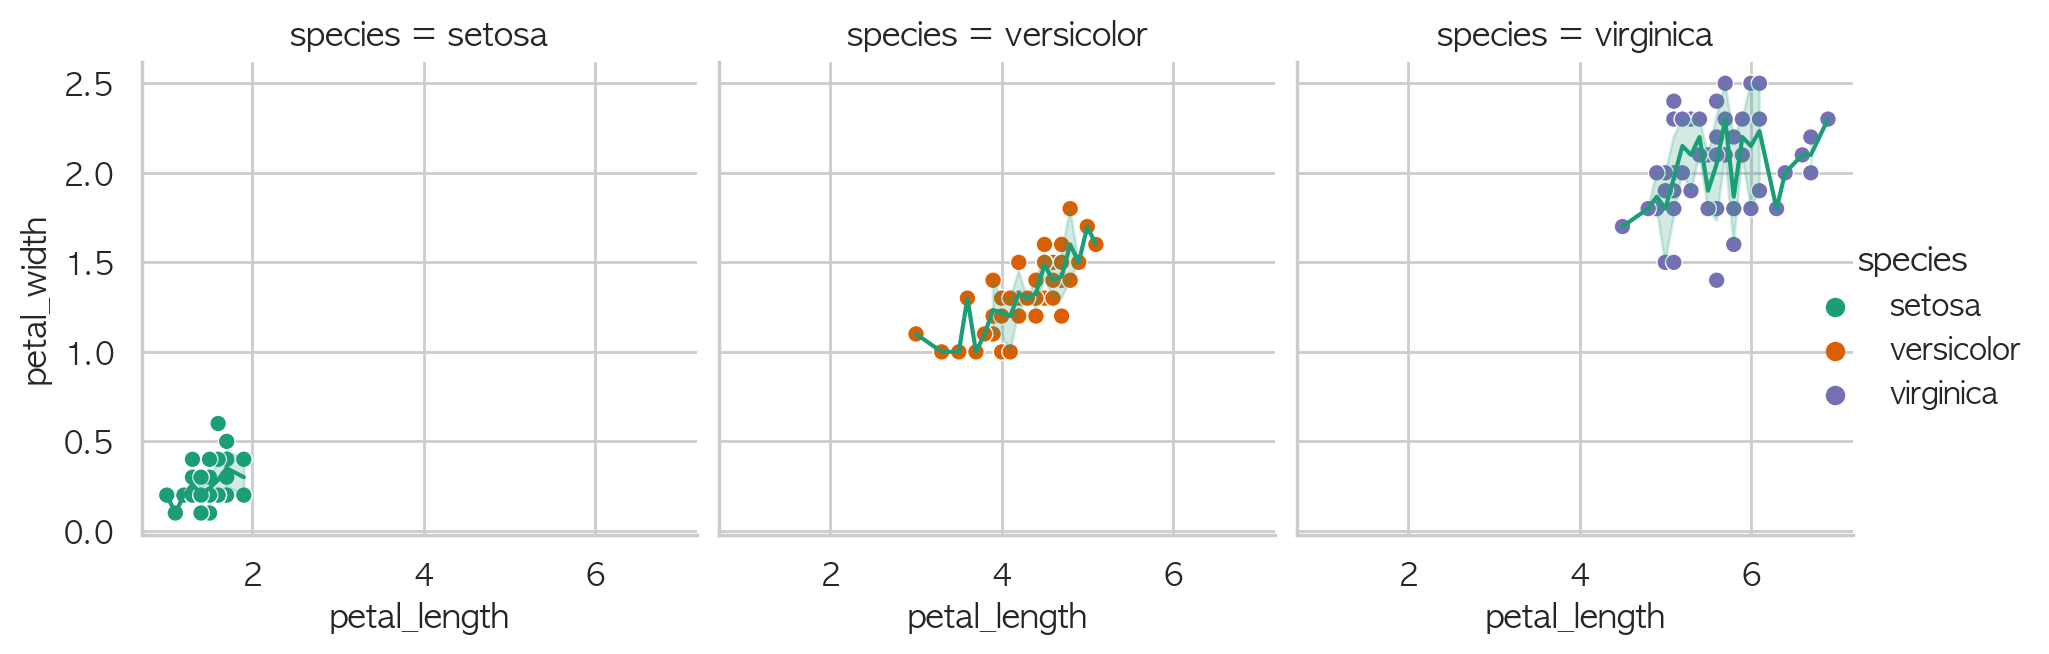

In [15]:
# line과 scatter를 종별 서브플롯으로 견겹서

g = sns.relplot(data=iris,
            x='petal_length',
            y='petal_width',
            hue='species',
            col='species', # species 별 서브플롯
           )


# g 그래프에 line 플롯 추가
g.map_dataframe(sns.lineplot, x='petal_length', y='petal_width')

# 크기 조정 : 서브플롯에서는 내부적이 figure 새로 만들기 떄문에 figsize 무시
g.fig.set_size_inches(10,3)

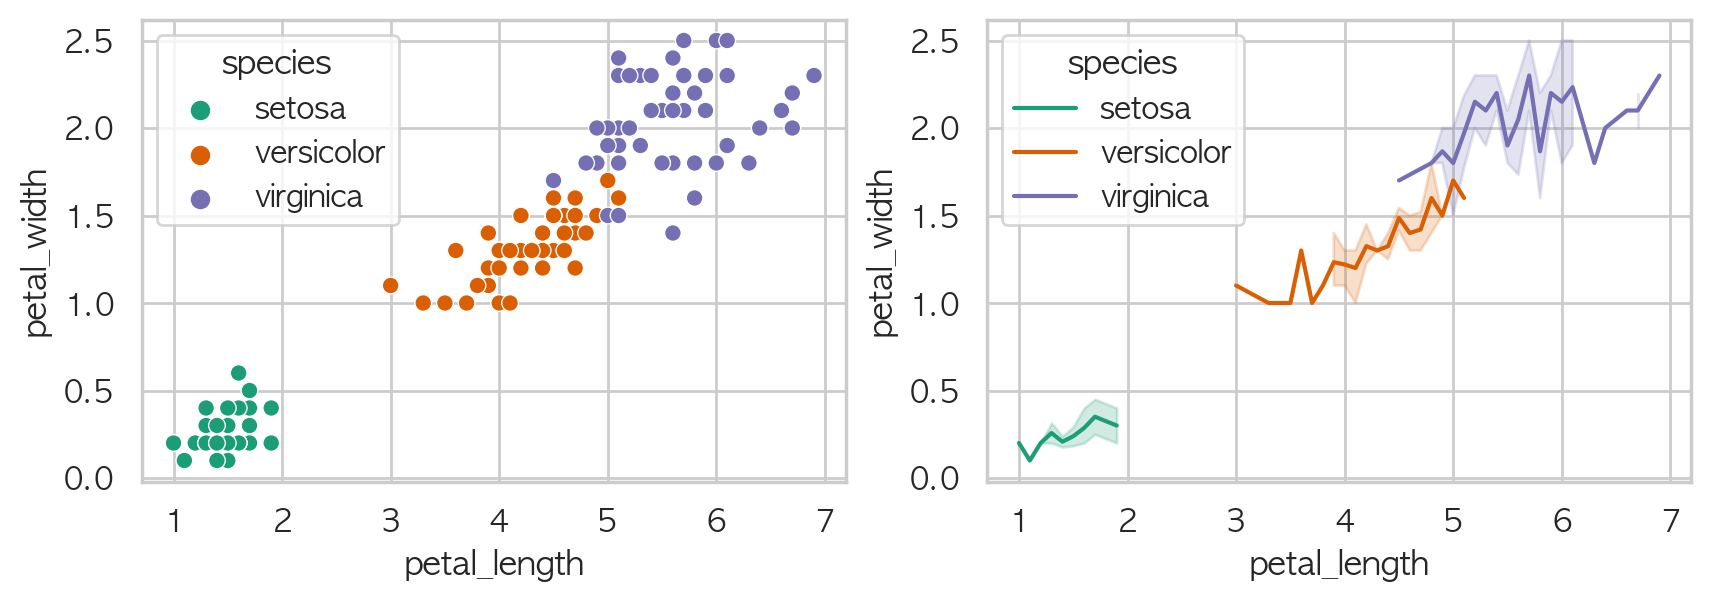

In [16]:
# ax[0] 에는 scatter, ax[1] lineplot

fig, ax = plt.subplots(1, ncols=2)

sns.scatterplot(data=iris,
                x='petal_length',
                y='petal_width',
                hue="species",
                ax=ax[0])
sns.lineplot(data=iris,
                x='petal_length',
                y='petal_width',
                hue="species",
                ax=ax[1])
plt.show()

### 2) 범주형 그래프

- x 축이 범주형 그래프
    ex) stripplot (무작위 홑뿌림), swarmplot (겹치지 않는 산점도)
        barplot, barhplot (y의 평균으로 막대그래프), pointplot(y의 평균으로 line)
        countplot (count는 x의 빈도수가 높이)
        boxplot, violinplot, boxenplot
        => catplot (서블플롯)

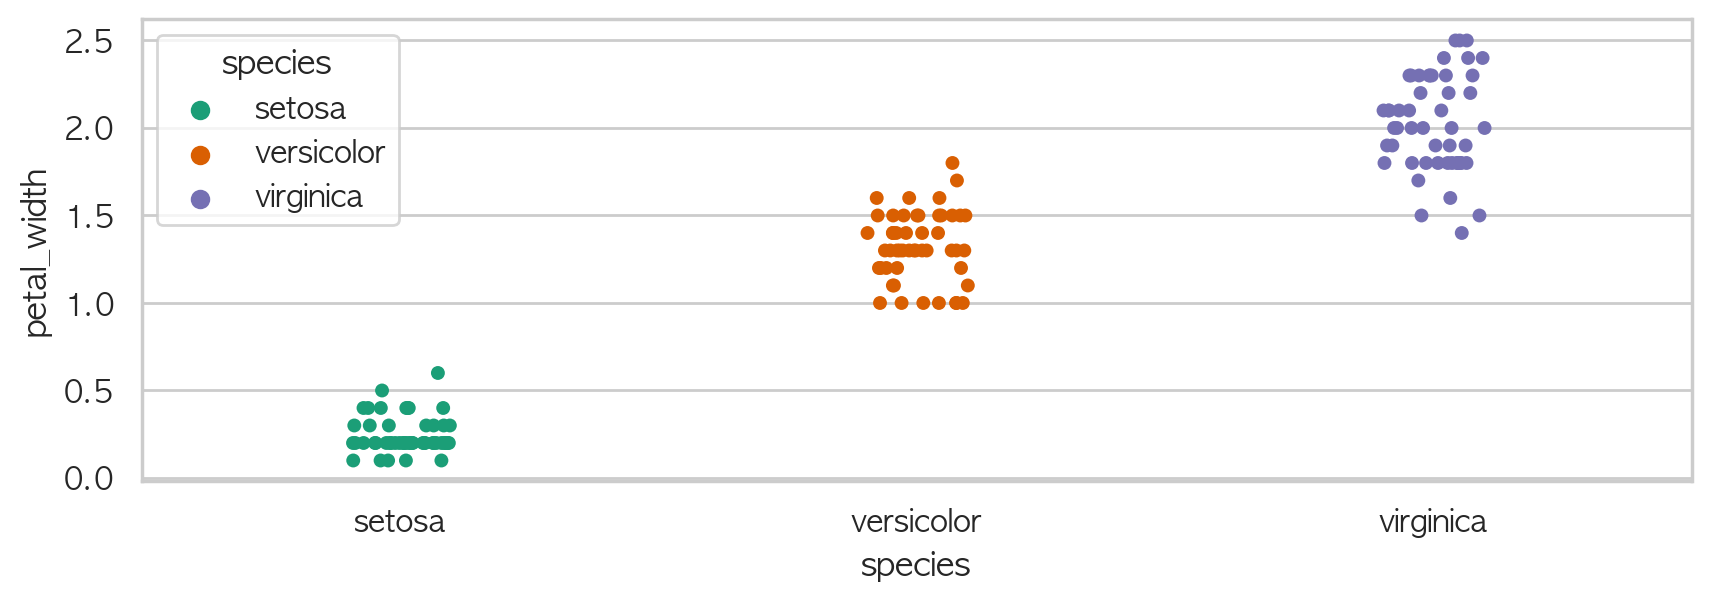

In [17]:
# stripplot : x축이 범주형일 떄의 산점도
sns.stripplot(data=iris, x="species", y='petal_width', hue='species')

plt.show()

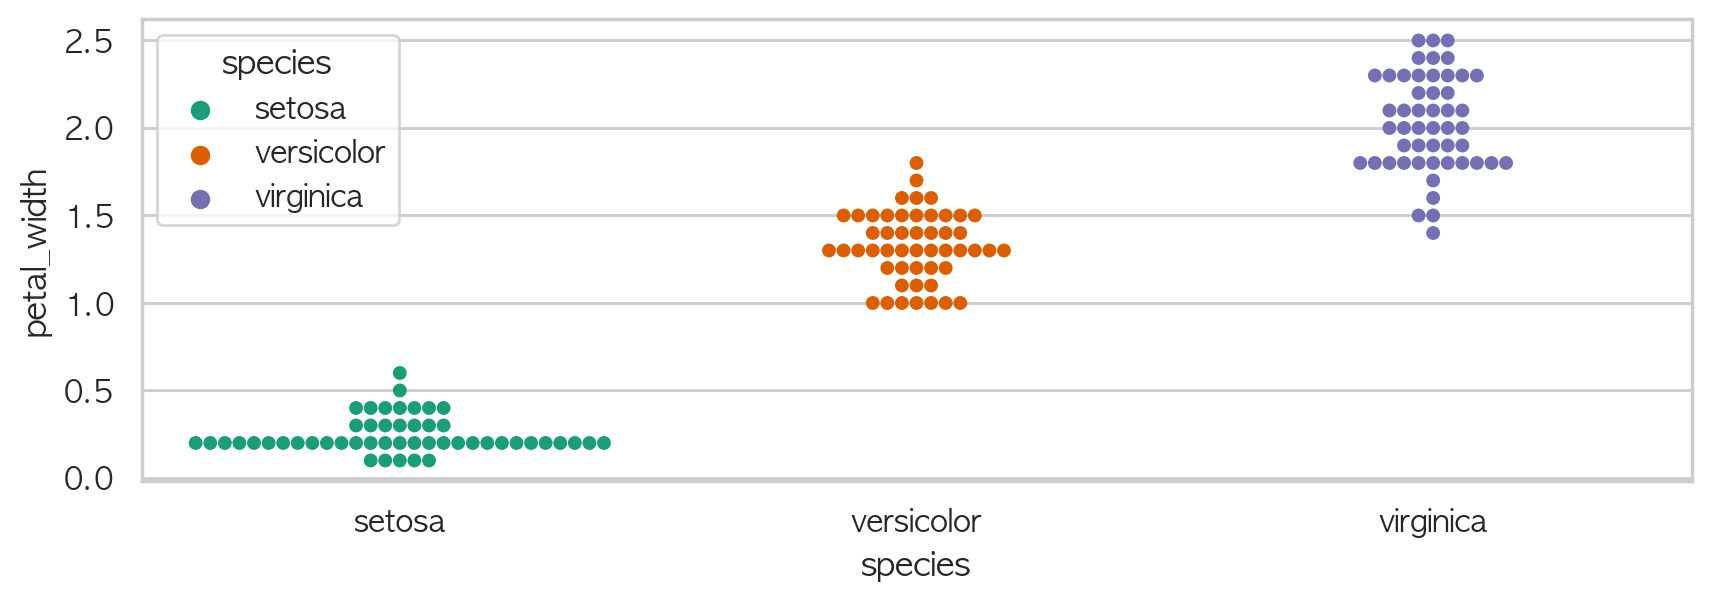

In [18]:
# swarmplot : x축이 범주형일 떄의 산점도 (분포포함)
sns.swarmplot(data=iris, x="species", y='petal_width', hue='species')

plt.show()

In [138]:
# 범주형 그래프의 x축을 지정하지 않으면
# sns.swarmplot(data=iris)

# plt.show()

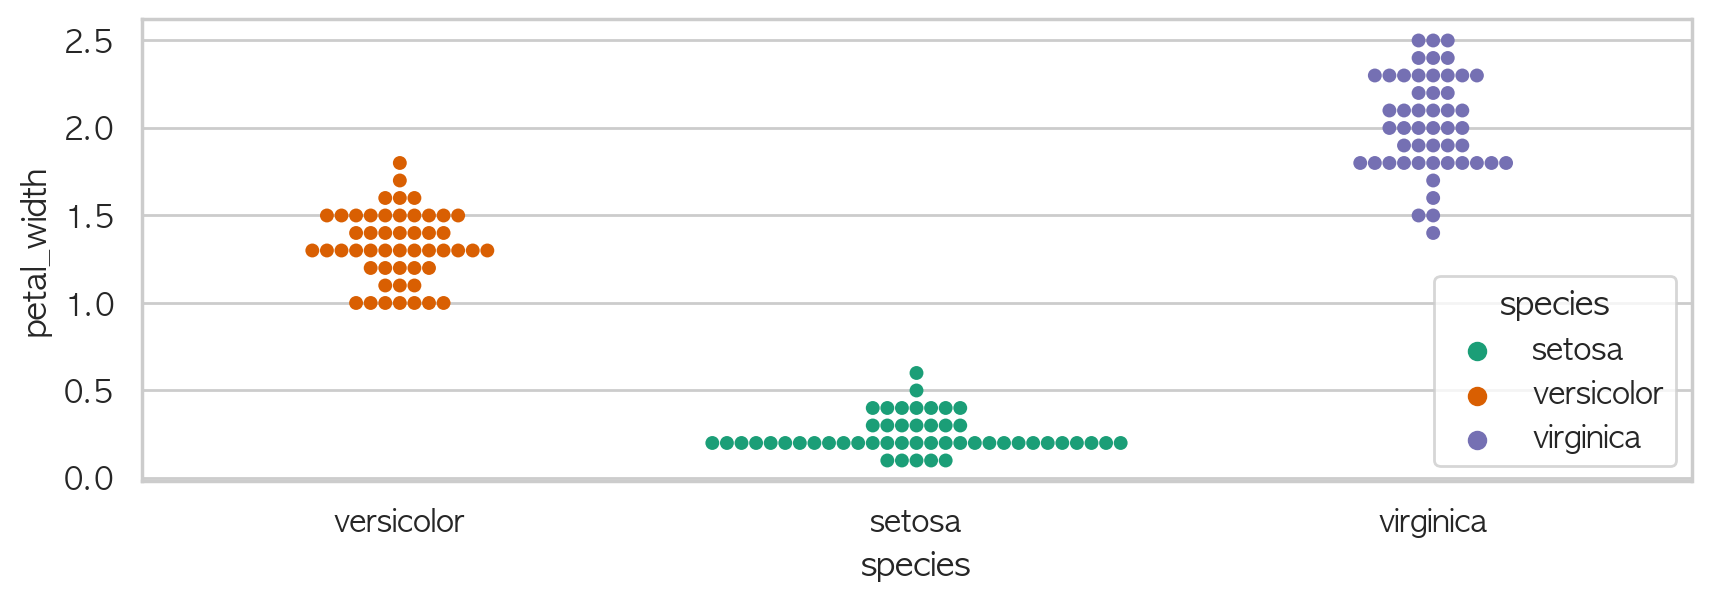

In [19]:
# iris[::25]
sns.swarmplot(data=iris, x='species', y='petal_width', hue='species', order=['versicolor','setosa','virginica']) 
plt.show()

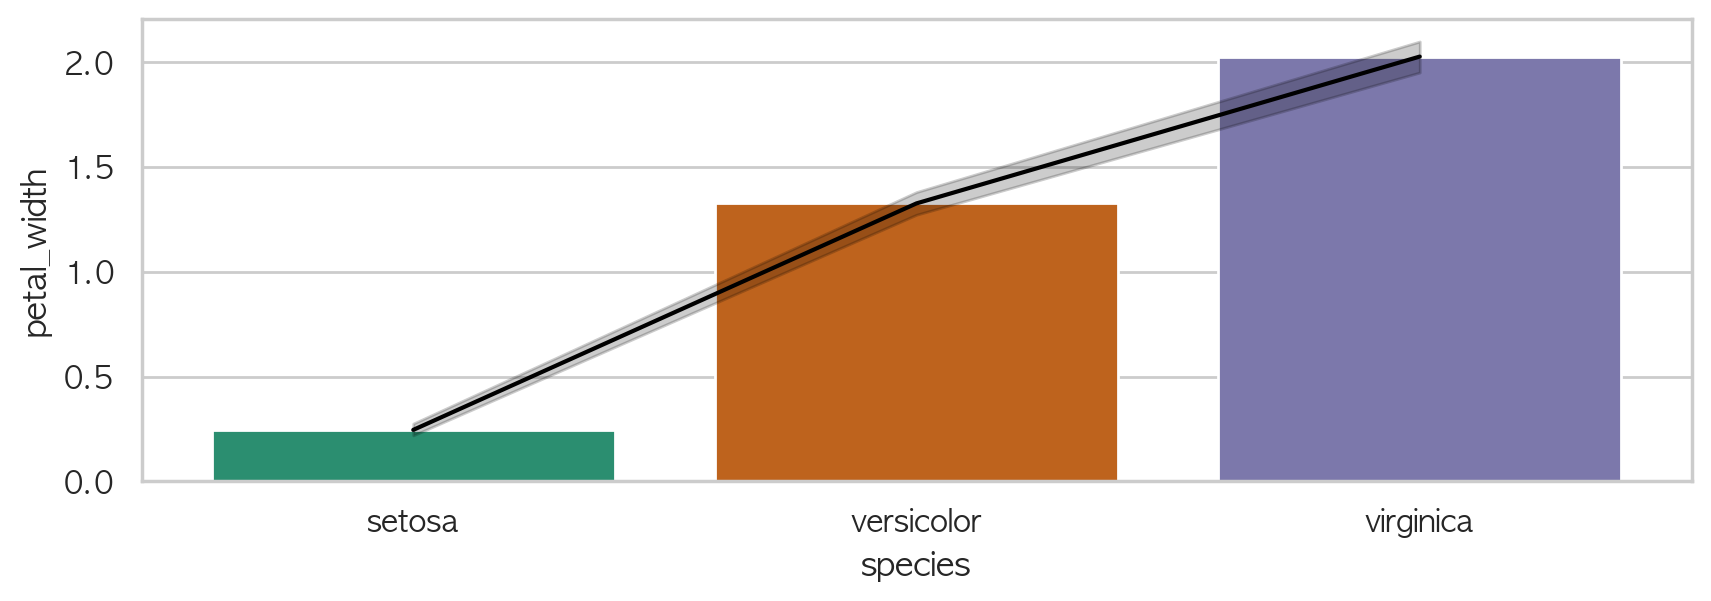

In [20]:
# barplot, barhplot, pointplot : 각 범주별 평균값(y)과 그에 대한 신뢰구간
# 신뢰구간 제외 :  errorbar=None
sns.barplot(
    data=iris,
    x='species',
    y='petal_width',
    errorbar=None,
    # ci=None # errorbar=None 로 ...
)

sns.lineplot(data=iris, x='species', y='petal_width', color='k')
plt.show()

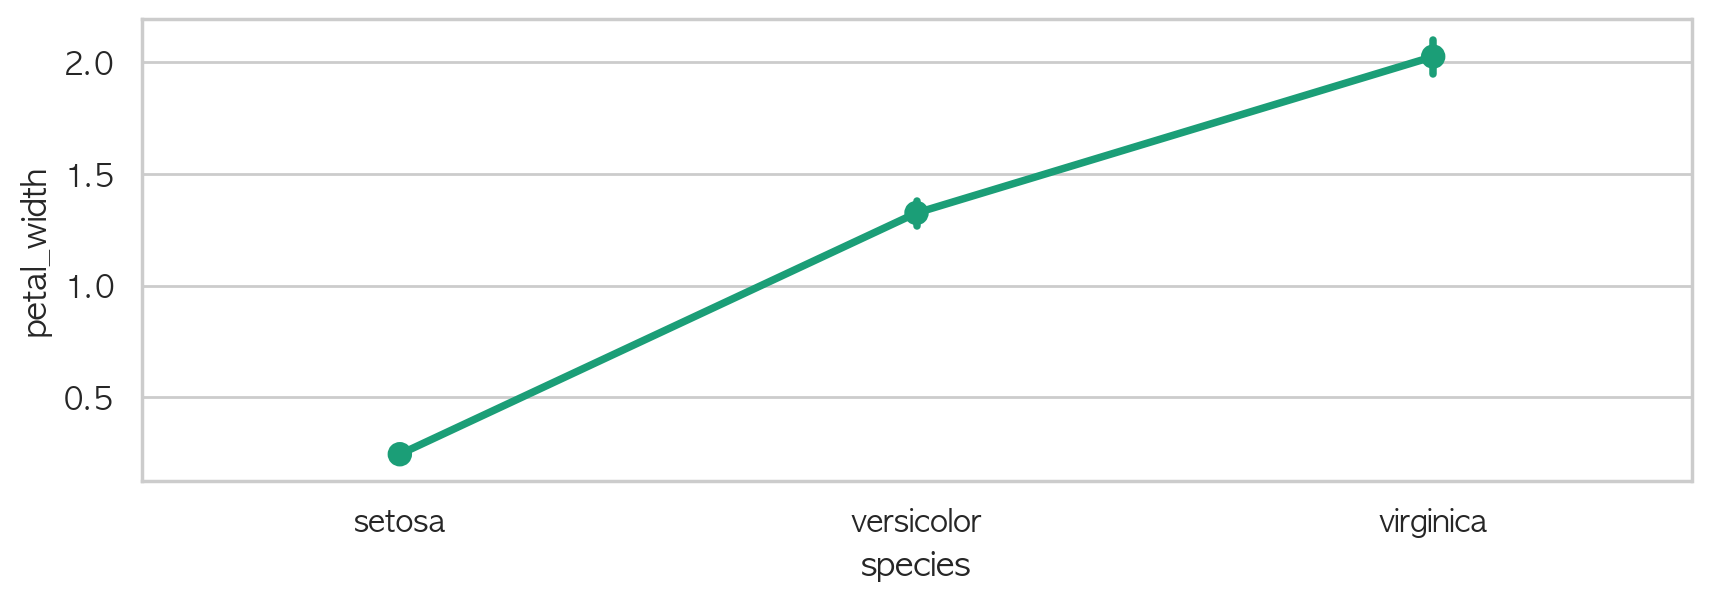

In [21]:
sns.pointplot(
    data=iris,
    x='species',
    y='petal_width',
) # 신뢰구간 없음
plt.show()

In [22]:

titanic.head(2)

# sns.barplot(data='titanic')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [23]:
# titanic.info()
titanic.dtypes.head(3)

survived     int64
pclass       int64
sex         object
dtype: object

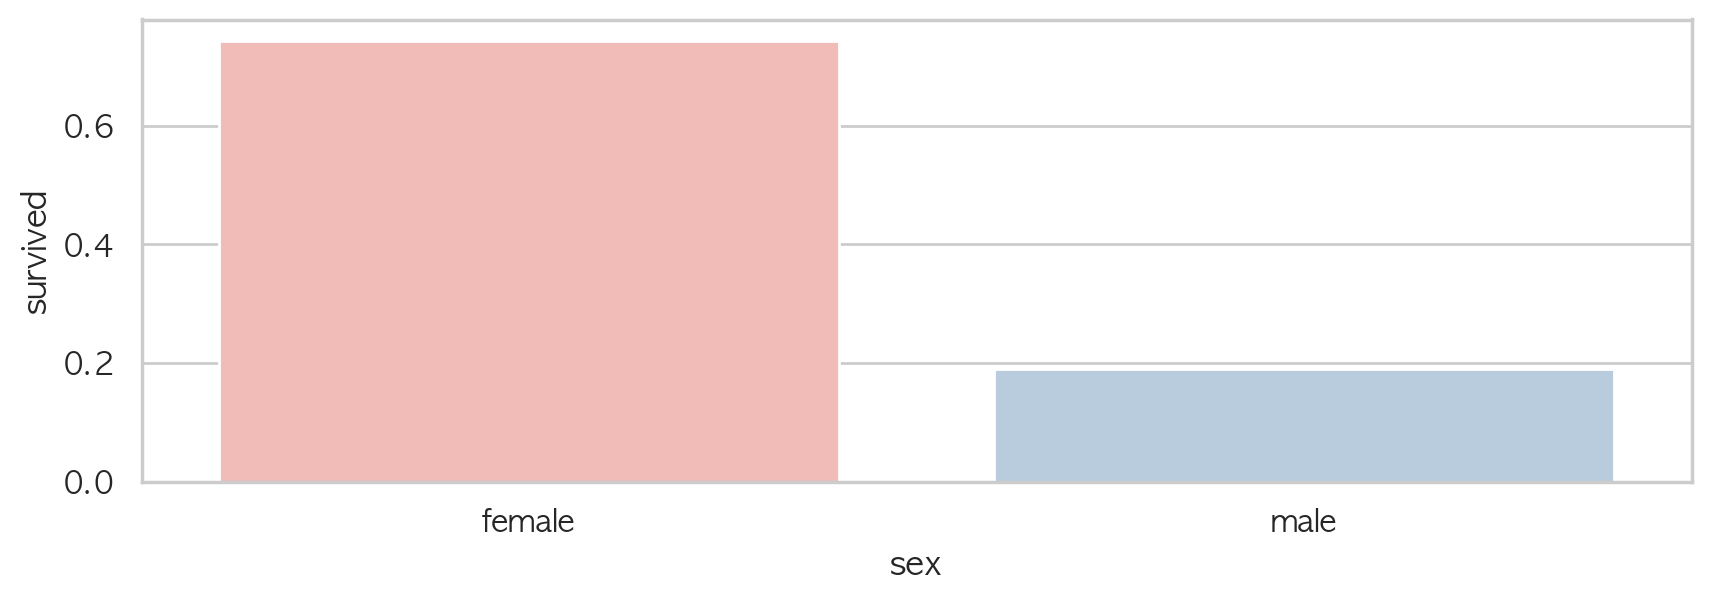

In [25]:
# titanic 데이터에서 성별 생존율을 막대그래프
sns.barplot(data=titanic,
            x='sex',
            y='survived',
            order=['female', 'male'],
            palette="Pastel1",
            errorbar=None
           )
plt.show()

In [30]:
titanic.sex.value_counts()

male      577
female    314
Name: sex, dtype: int64

In [33]:
# 남자 중 비생존자
len(titanic[(titanic.sex == 'male') & (titanic.survived == 0)])

468

In [36]:
# 남자 중 생존자
len(titanic[(titanic.sex == 'male') & (titanic.survived == 1)])

109

In [40]:
# 여자 중 비생존자
len(titanic[(titanic.sex == 'female') & (titanic.survived == 0)])

81

In [37]:
# 여자 중 생존자
len(titanic[(titanic.sex == 'female') & (titanic.survived == 1)])

233

In [44]:
titanic.sample(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
96,0,1,male,71.0,0,0,34.6542,C,First,man,True,A,Cherbourg,no,True
327,1,2,female,36.0,0,0,13.0000,S,Second,woman,False,D,Southampton,yes,True


In [47]:
titanic.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

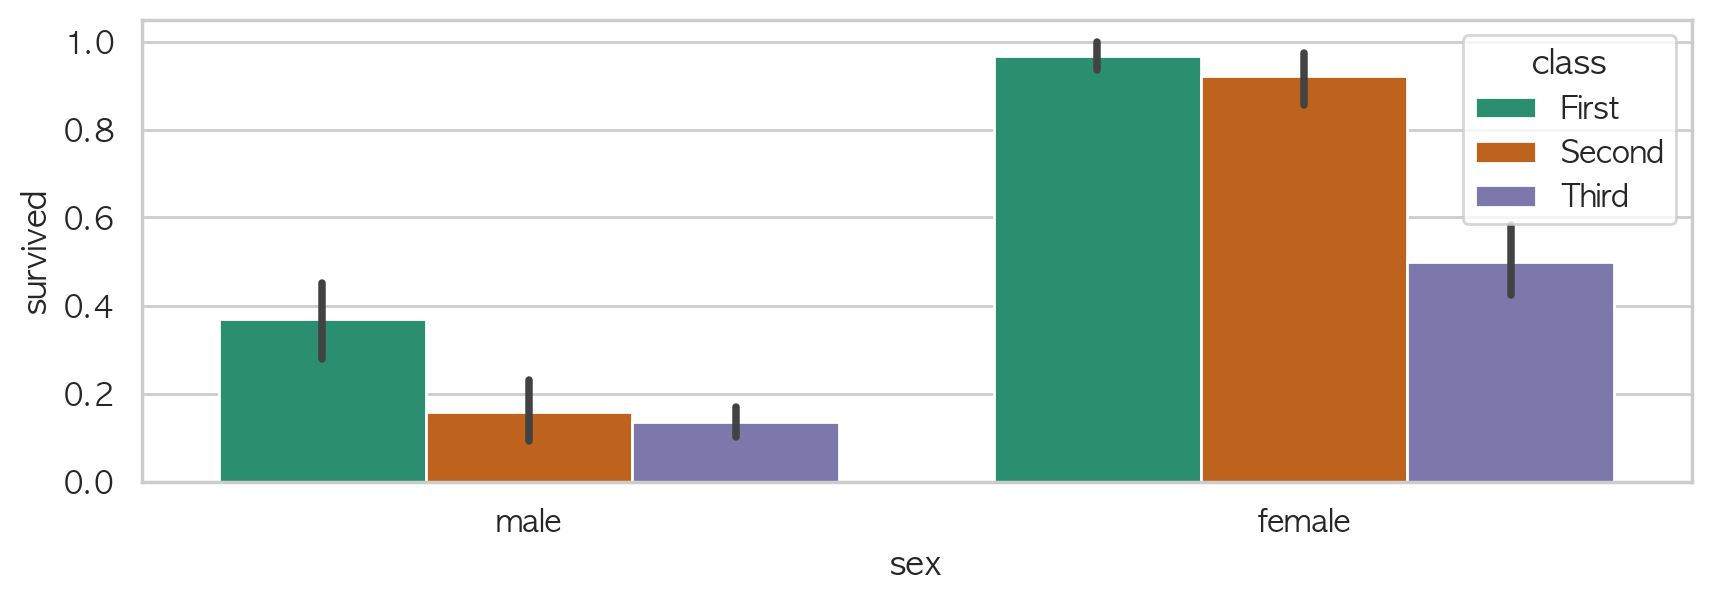

In [53]:
# 성별 생존율, hue='class'
sns.barplot(data=titanic, x='sex', y='survived', hue="class")
plt.show()

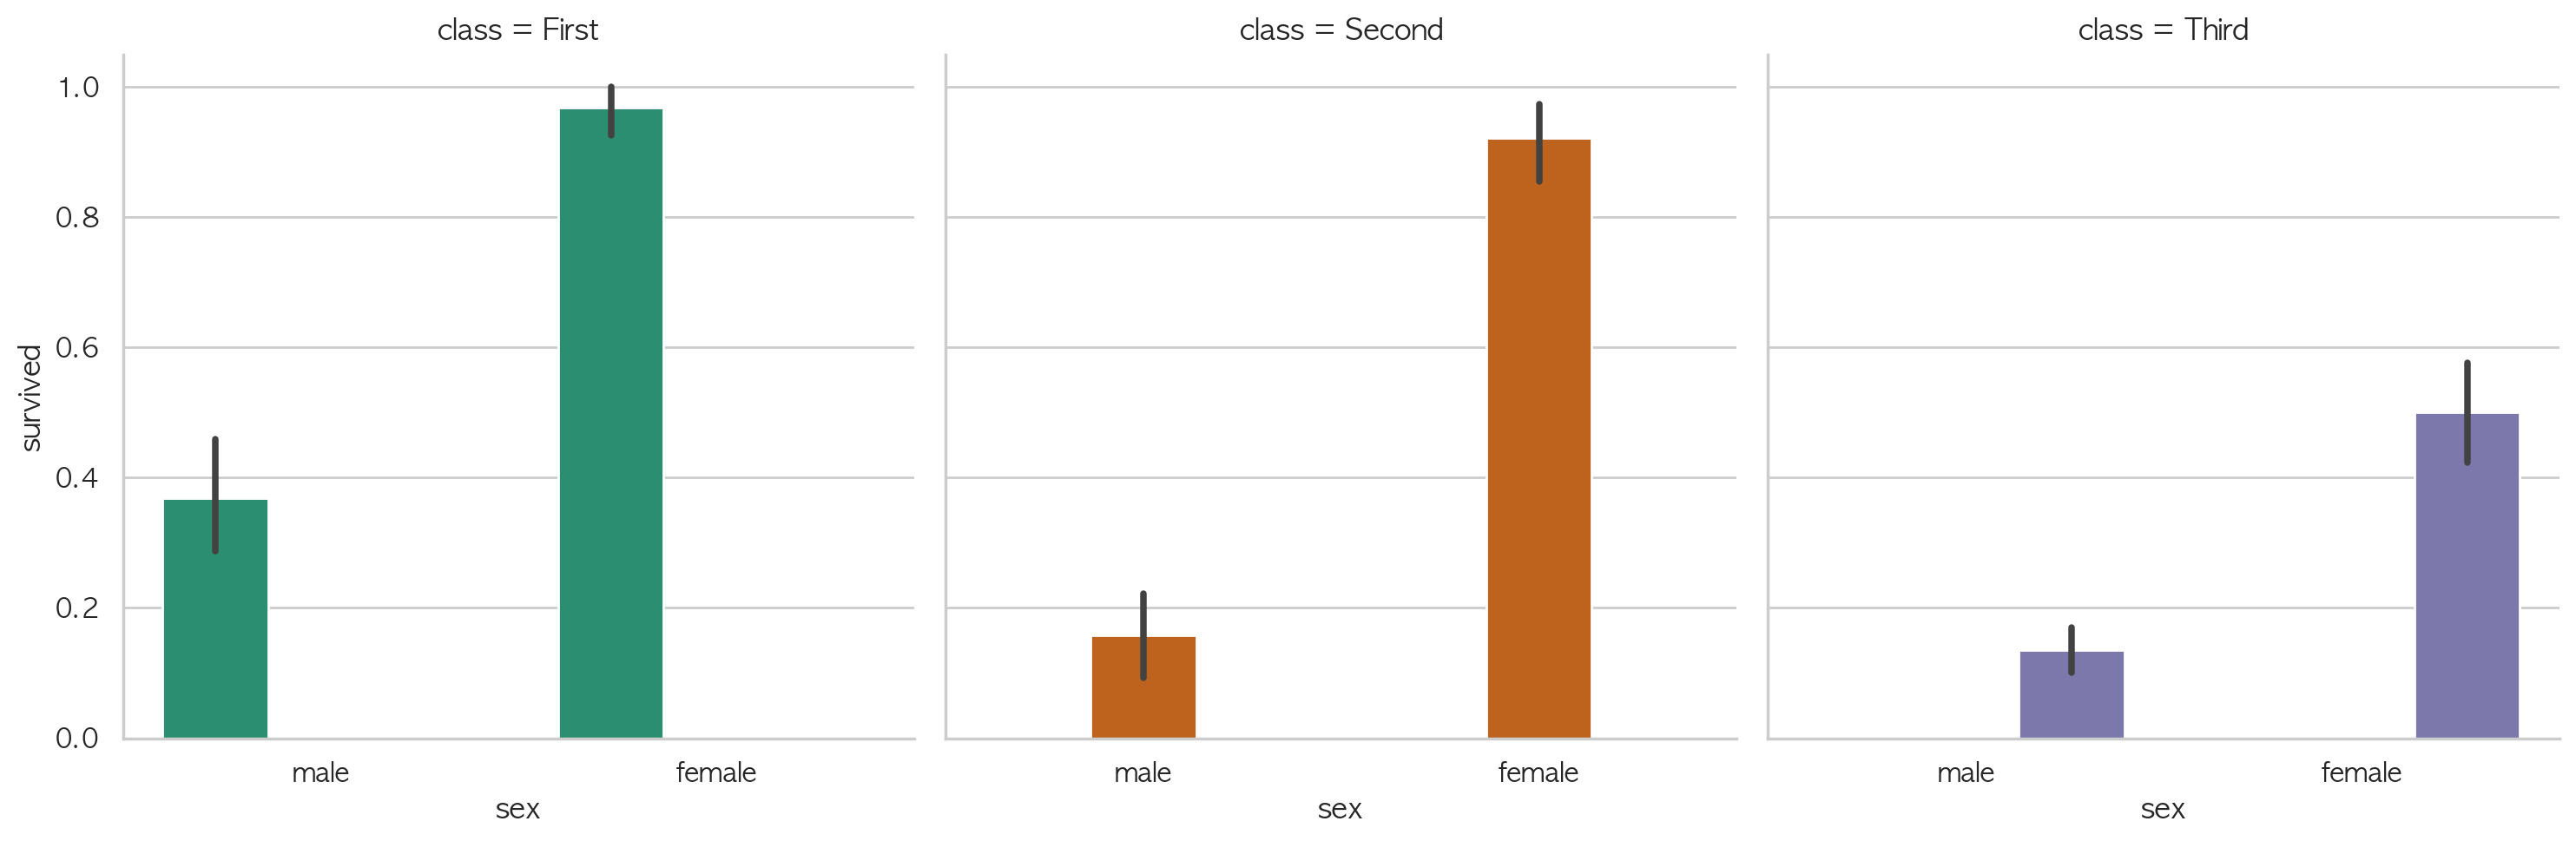

In [65]:
sns.catplot(
    data=titanic,
    x='sex',
    y='survived',
    hue='class',
    kind='bar',  # 기본값 stripplot
    col='class',
    # col_wrap=2  # 한 행에 그려질 서브플롯 갯수. 기본값 n개
)
g.fig.set_size_inches(10, 3)
plt.show()

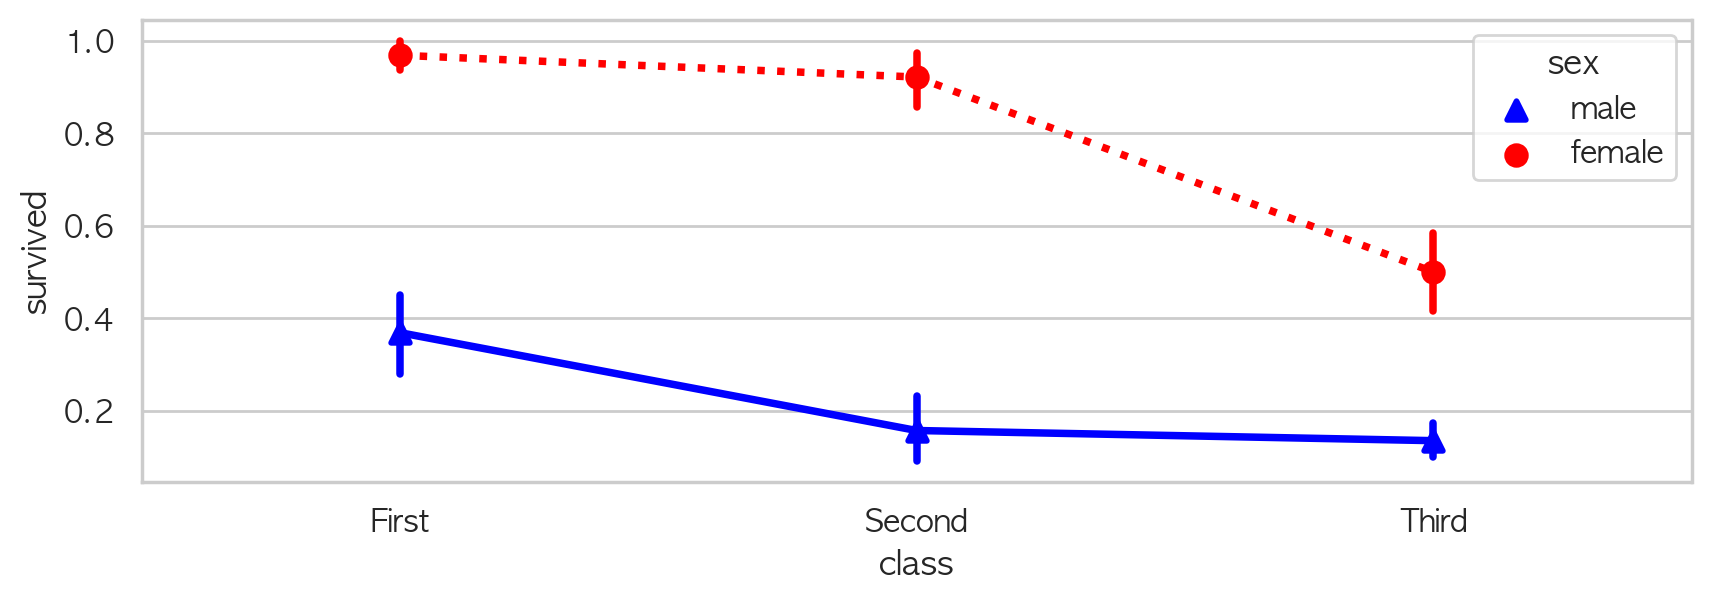

In [71]:
# 성별 생존율, hue='class'
sns.pointplot(data=titanic,
              x='class',
              y='survived',
              hue="sex",
              markers=['^', 'o'],
              linestyles=['-', ':'],
              palette={
                  'male': 'b',
                  'female': 'r'
              })
plt.show()

In [83]:
totallen = len(titanic)
nanlen = titanic.deck.isna().sum()
datalen = totallen - nanlen

print('deck 전체 갯수 : {} , 결측치 갯수 : {}, 데이터갯수 : {}'.format(totallen, nanlen,datalen))

deck 전체 갯수 : 891 , 결측치 갯수 : 688, 데이터갯수 : 203


In [98]:
deckcnt = titanic.deck.value_counts() # 범주별 데이터 갯수(정렬 포함)
deckcnt # deckcnt.index가 count가 큰순


C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

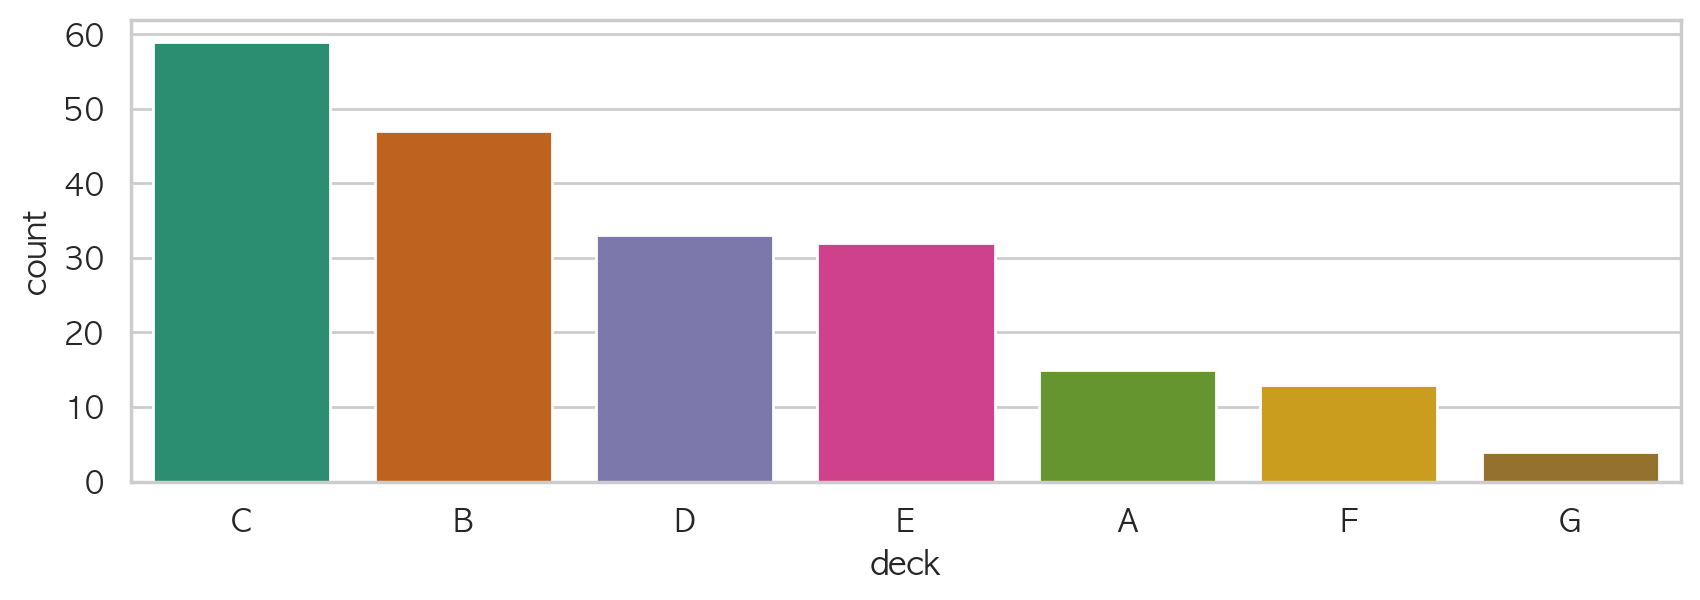

In [100]:
# deck 별 갯수 막대그래프 (countplot)
sns.countplot(data=titanic,
              x='deck',
              order=deckcnt.index
             )
plt.show()

In [95]:
# titanic.groupby('deck').count()

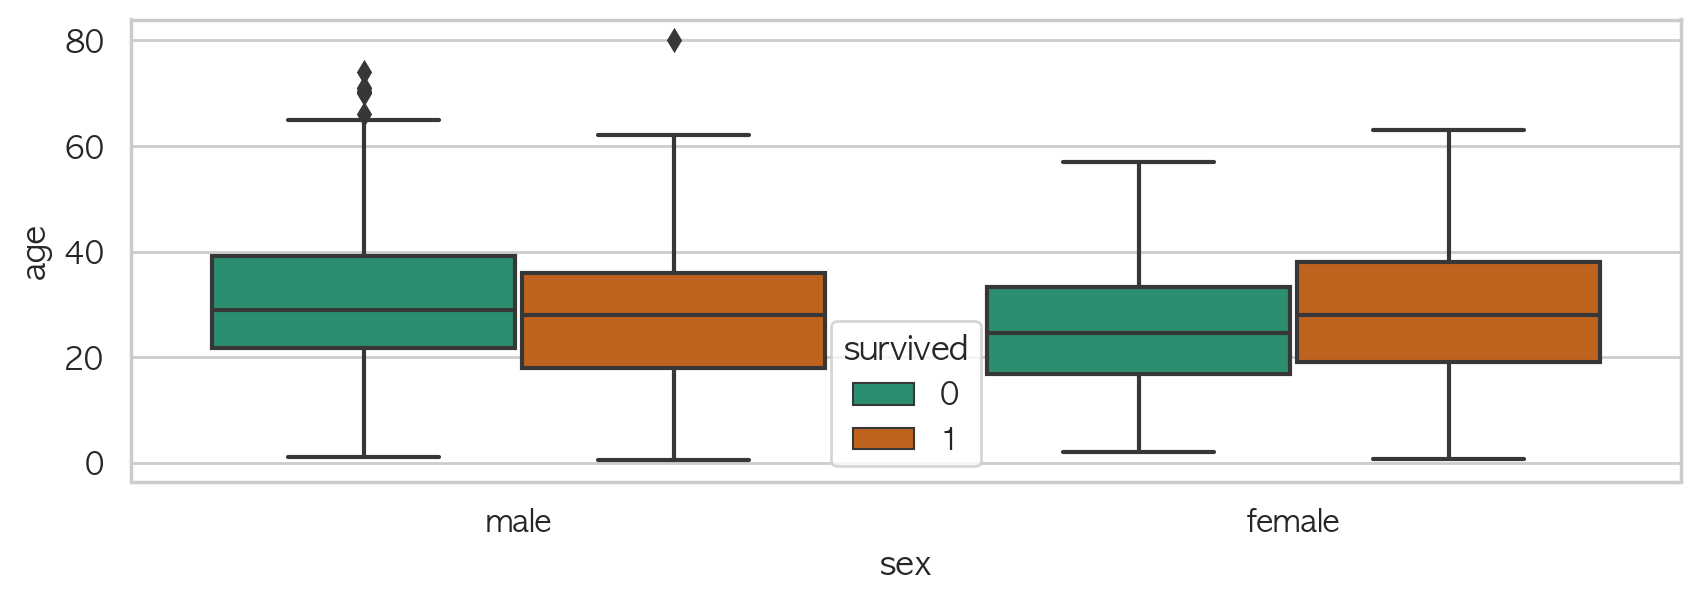

In [105]:
# boxplot
sns.boxplot(data=titanic, x='sex', y='age', hue='survived')
plt.show()

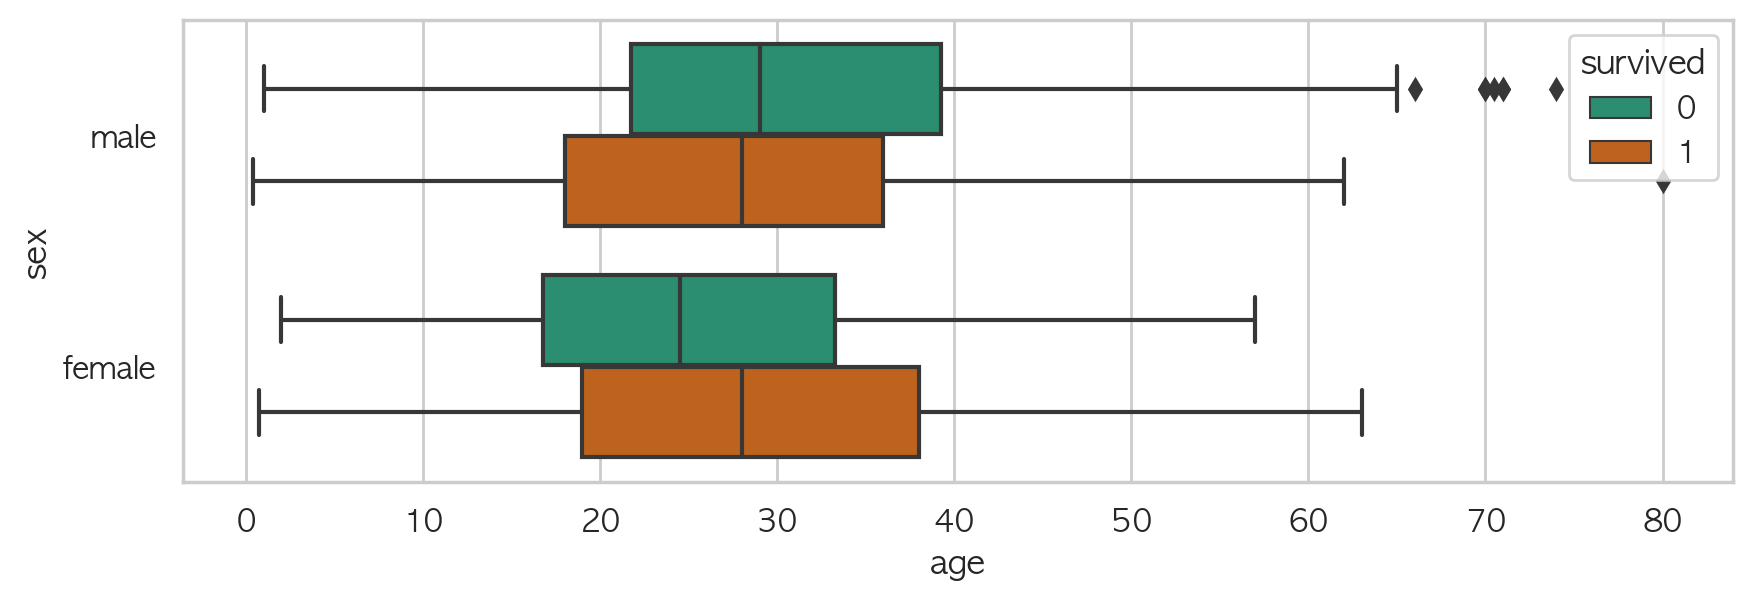

In [106]:
sns.boxplot(data=titanic, y='sex', x='age', hue='survived')
plt.show()

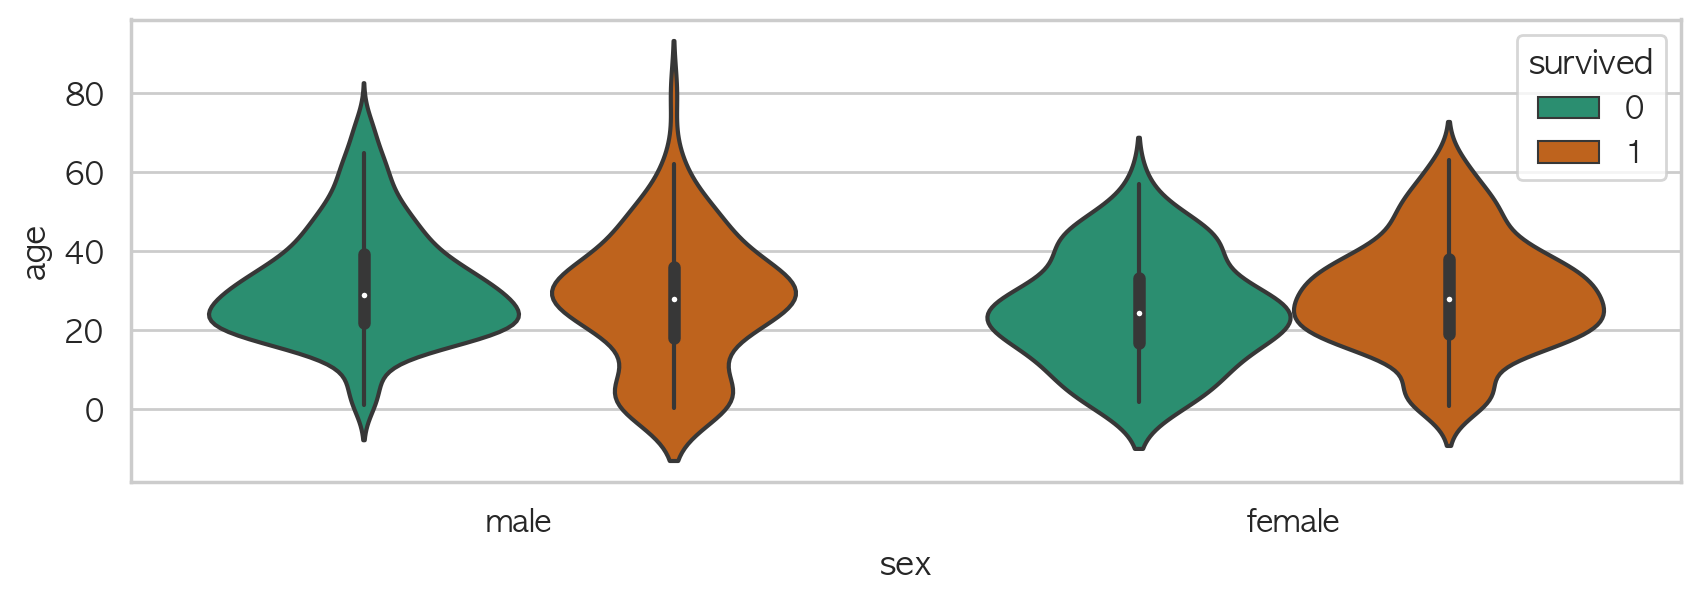

In [104]:
# violinplot
sns.violinplot(data=titanic, x='sex', y='age', hue='survived')
plt.show()

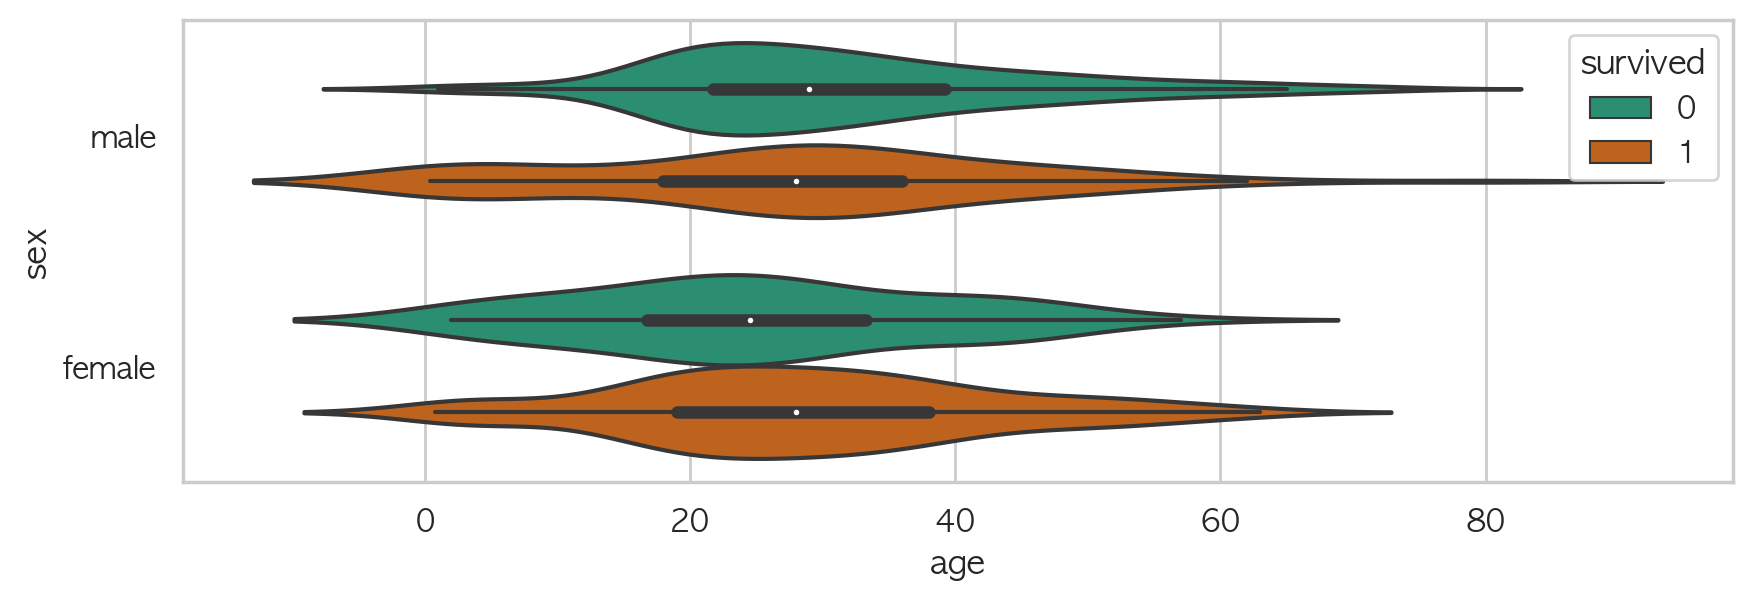

In [108]:
sns.violinplot(data=titanic, y='sex', x='age', hue='survived')
plt.show()

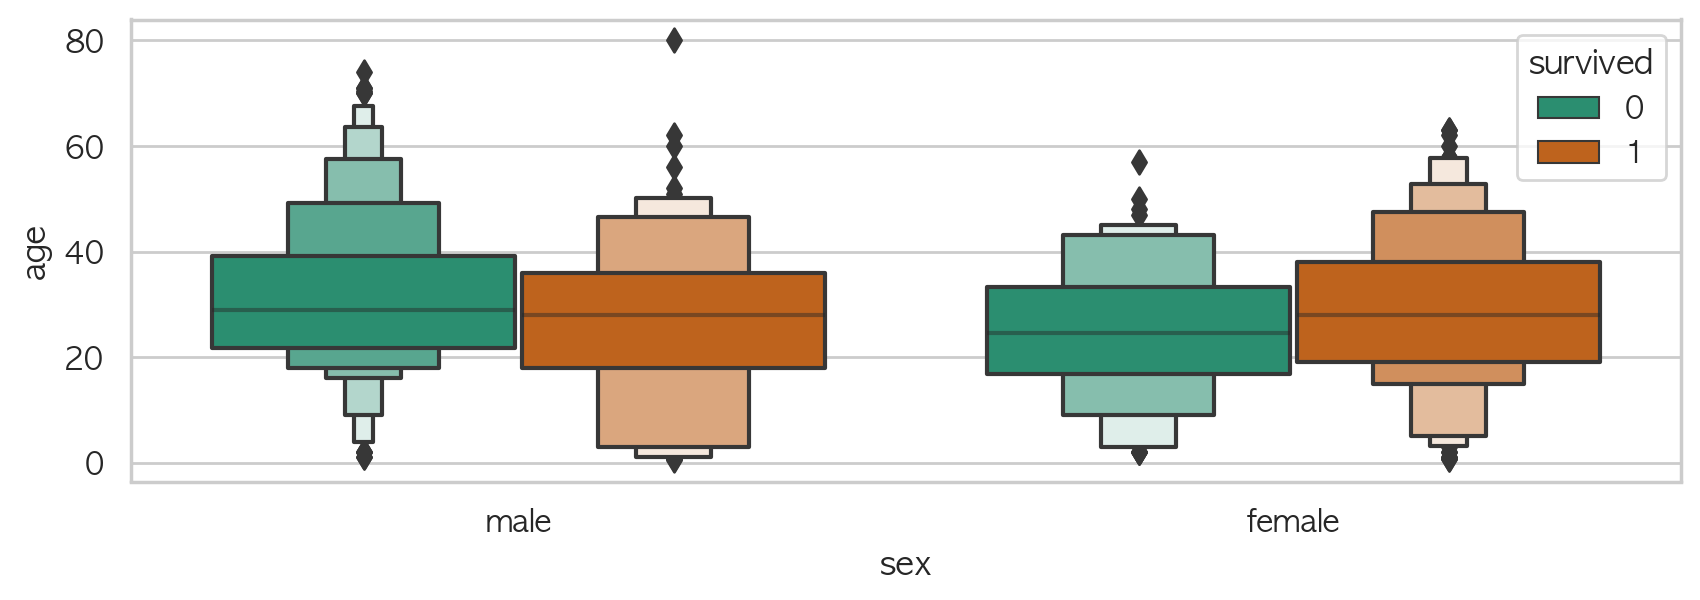

In [110]:
# boxenplot : box플롯 + 분포

sns.boxenplot(data=titanic, x='sex', y='age', hue='survived')
plt.show()

### 3) 쌍관계 그래프

- pairplot : 데이터프레임에 포함된 모든 수치형 변수 쌍에 대해 산점도(scatter)와 히스토그램

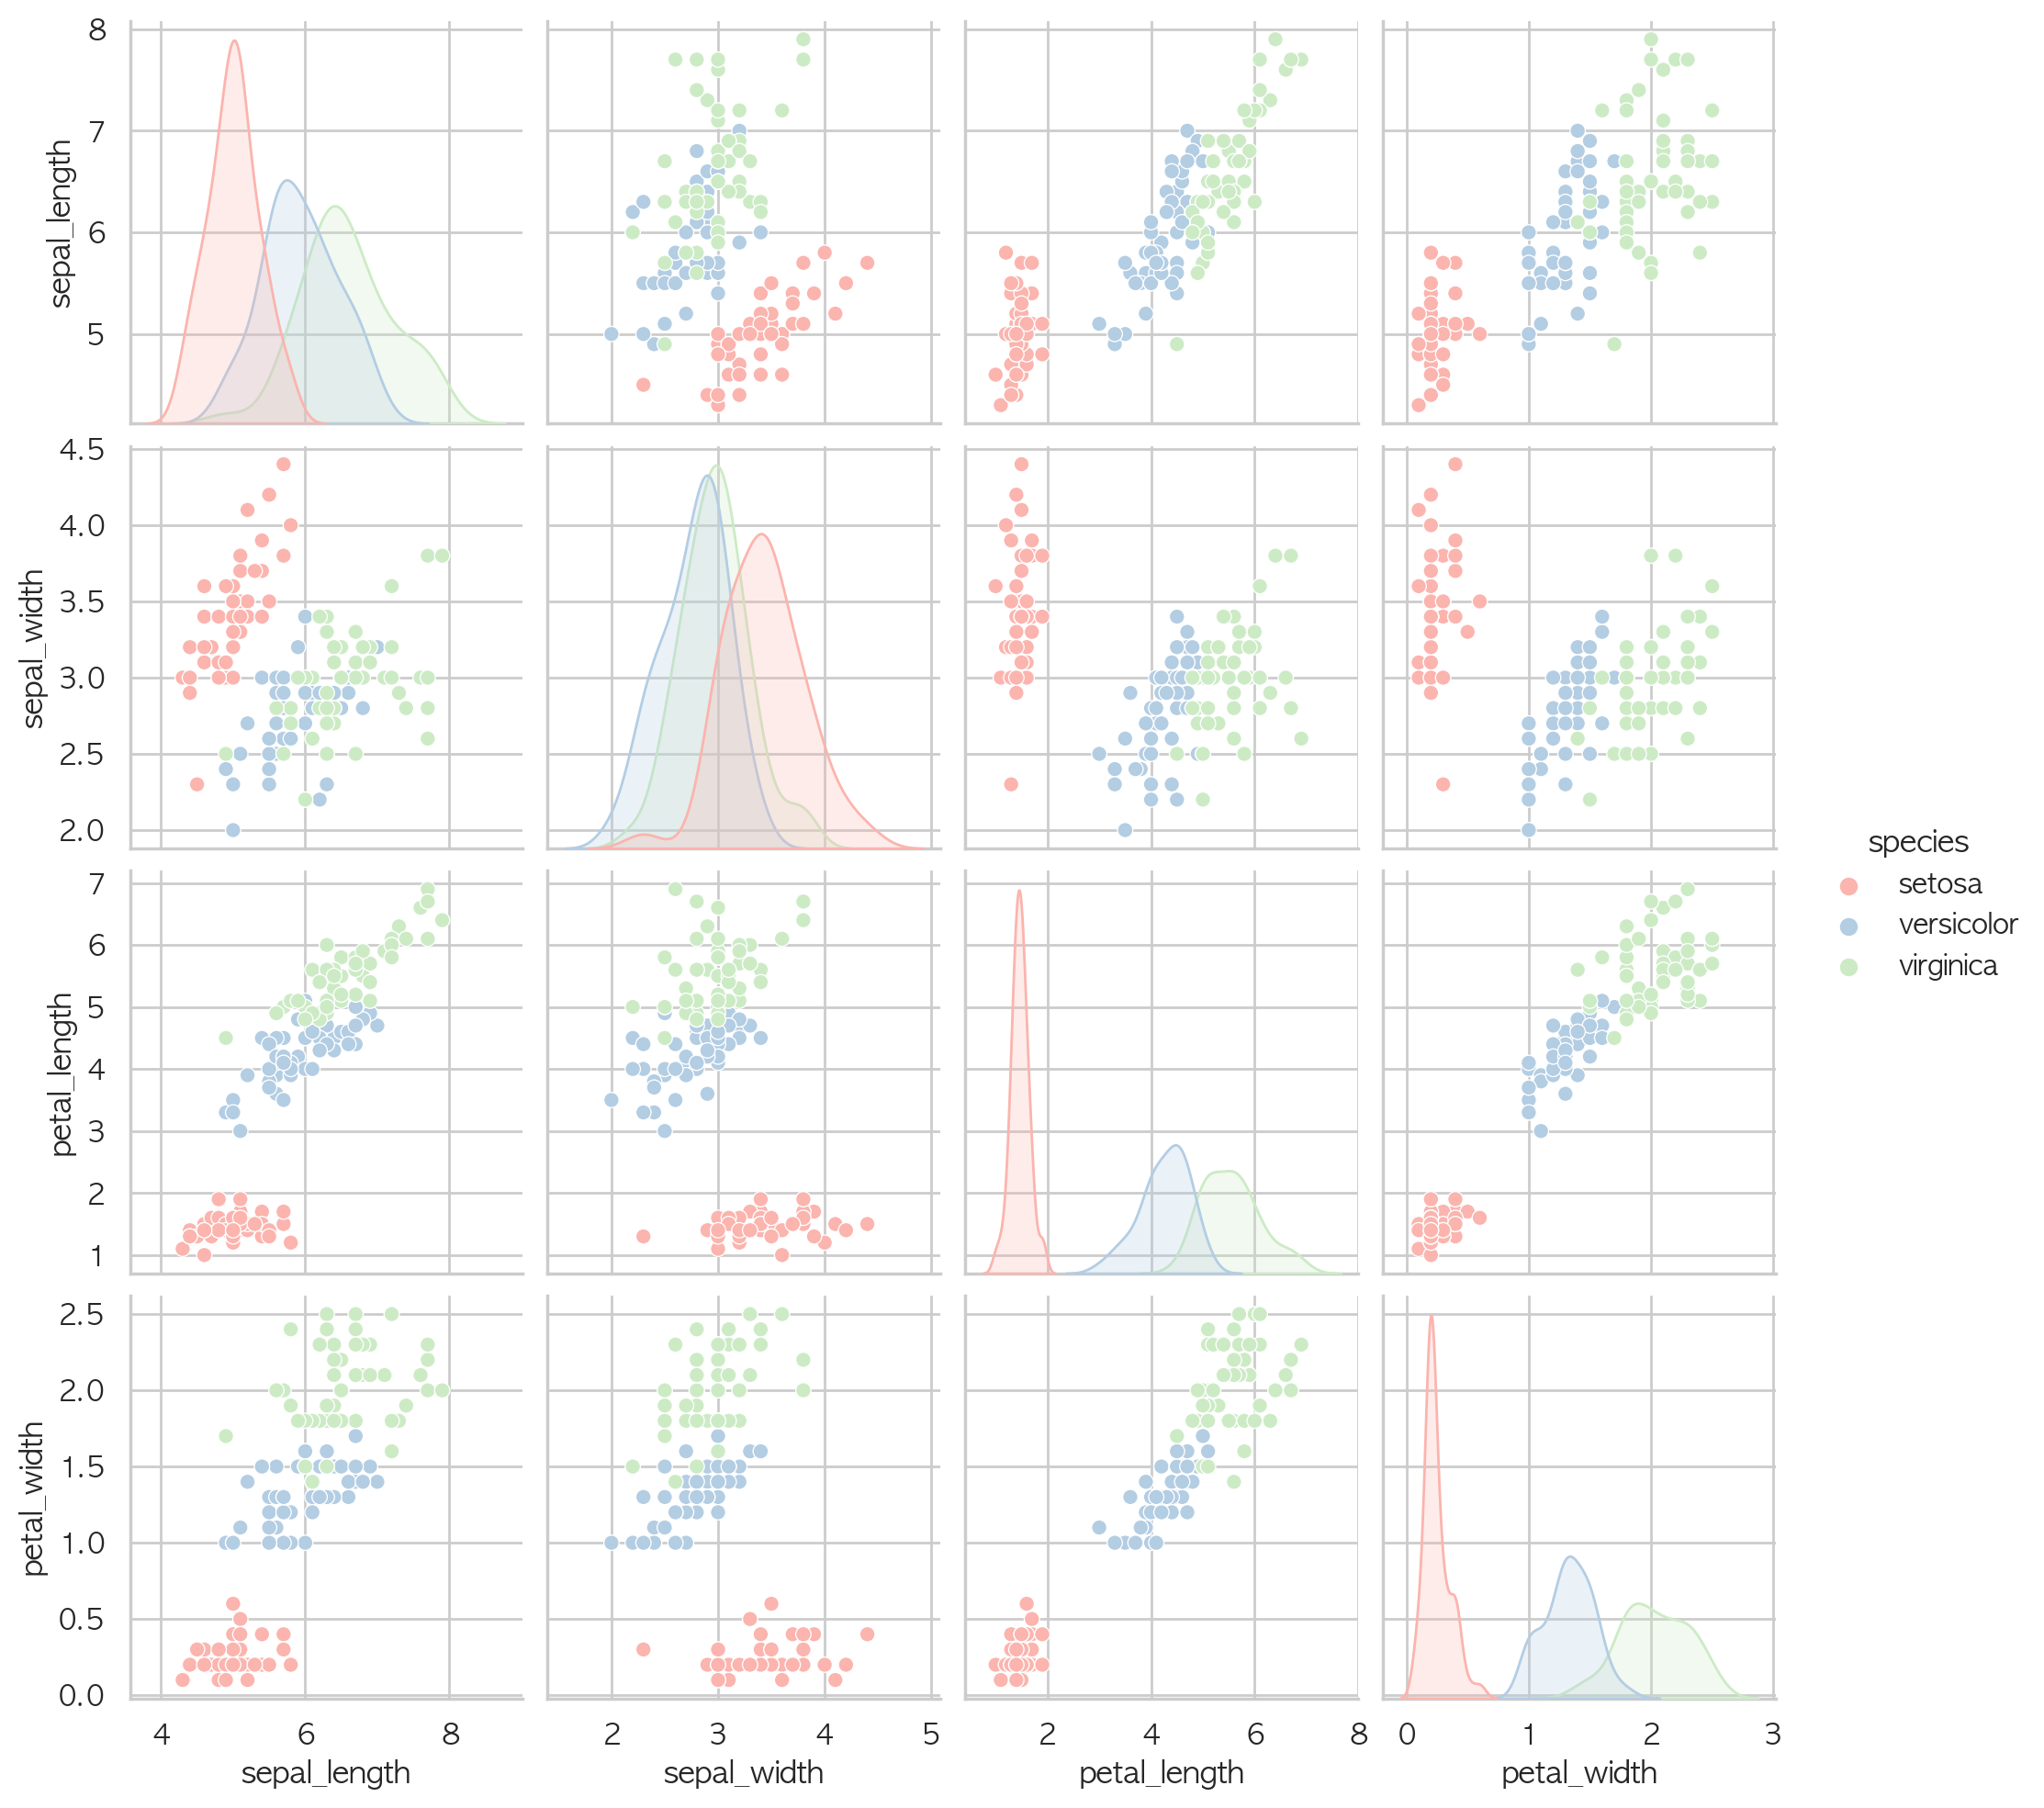

In [115]:
sns.pairplot(data=iris, hue='species', palette='Pastel1')
plt.show()

### 4) 밀도그래프

- histplot 
- displot

In [125]:

x = np.random.randn(10000) # 평균 0, 표준편자 1인 정규분포로 10000개 1차원 배열


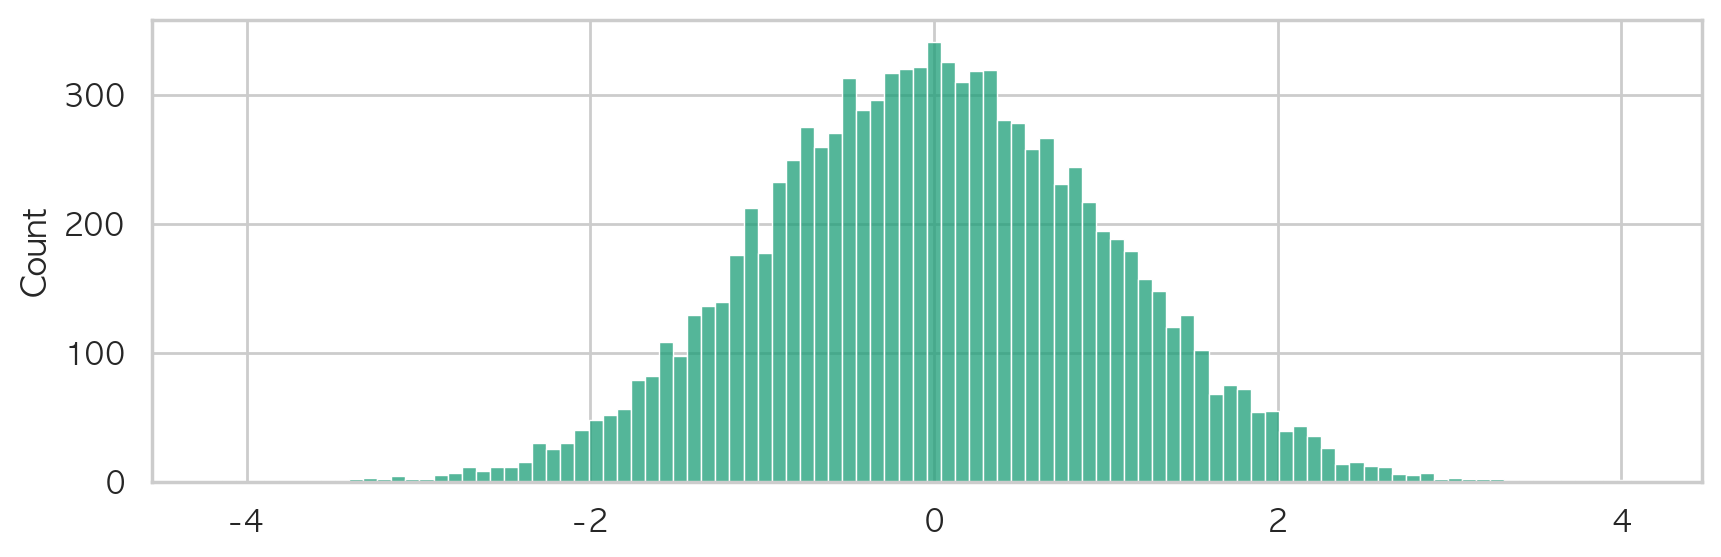

In [129]:
sns.histplot(x, bins=100)
plt.show()

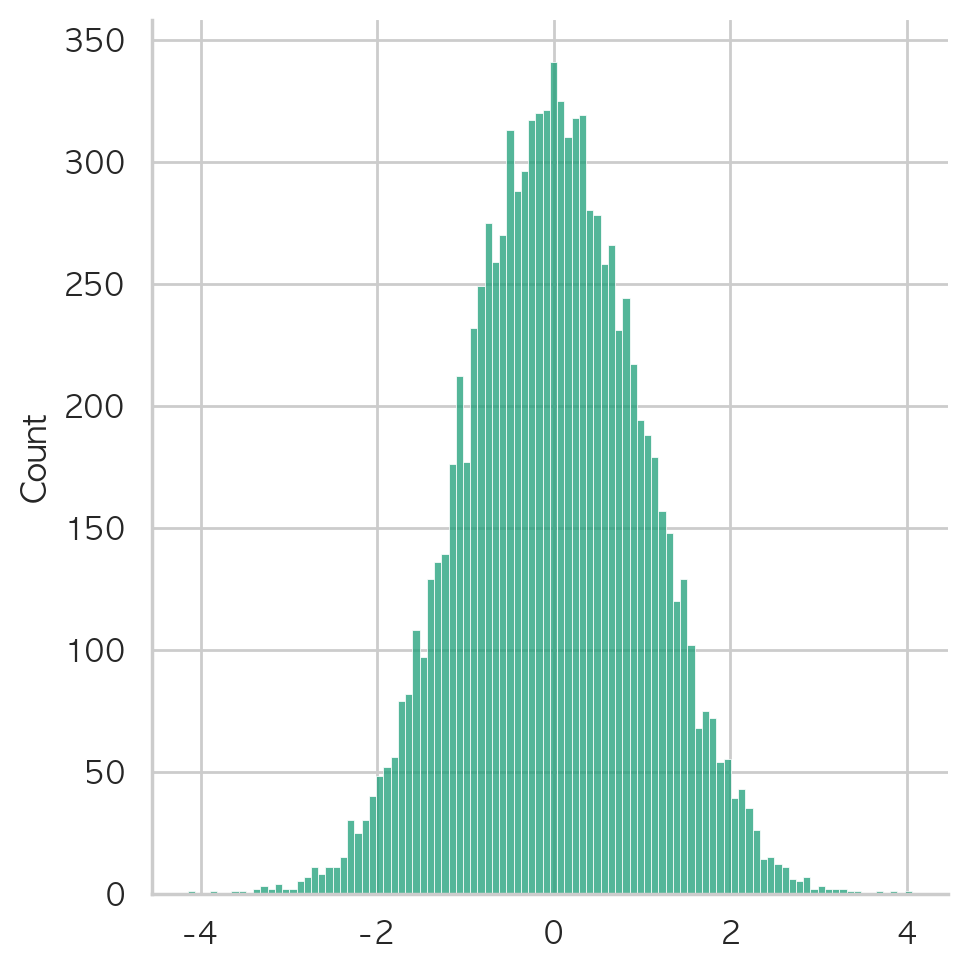

In [130]:
sns.displot(x, bins=100)
plt.show()

### 5) 회귀그래프

- regplot => lmplot (서브플롯)

In [137]:
corr = iris.corr(numeric_only=True)
corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


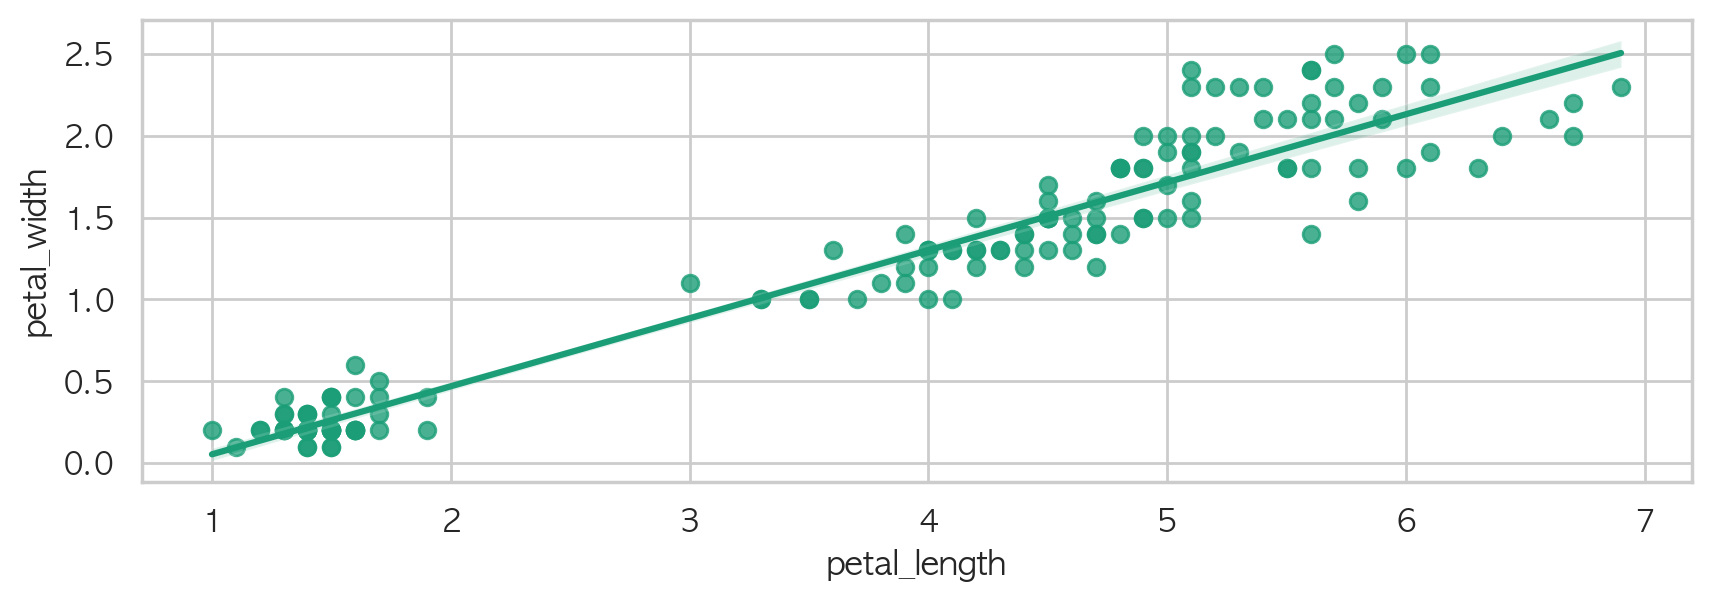

In [144]:
# 회귀 그래프 : regplot (hue 사용불가), lmplot (hue 사용가능)

sns.regplot(data=iris, x='petal_length', y='petal_width')
plt.show()

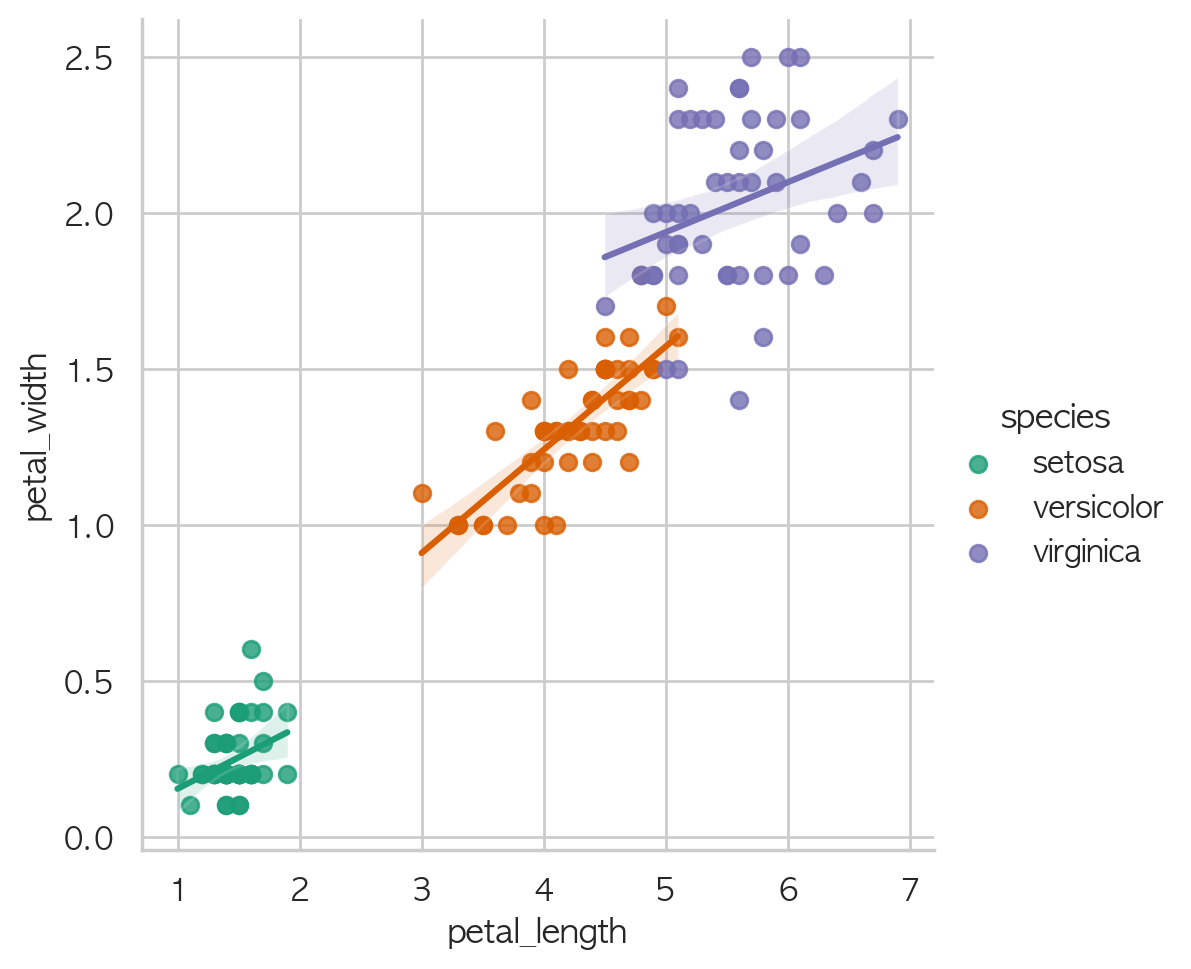

In [148]:
# 종별 회귀그래프
# sns.lmplot(data=iris, x='petal_length', y='petal_width', hue='species', col='species')
sns.lmplot(data=iris, x='petal_length', y='petal_width', hue='species')
plt.show()

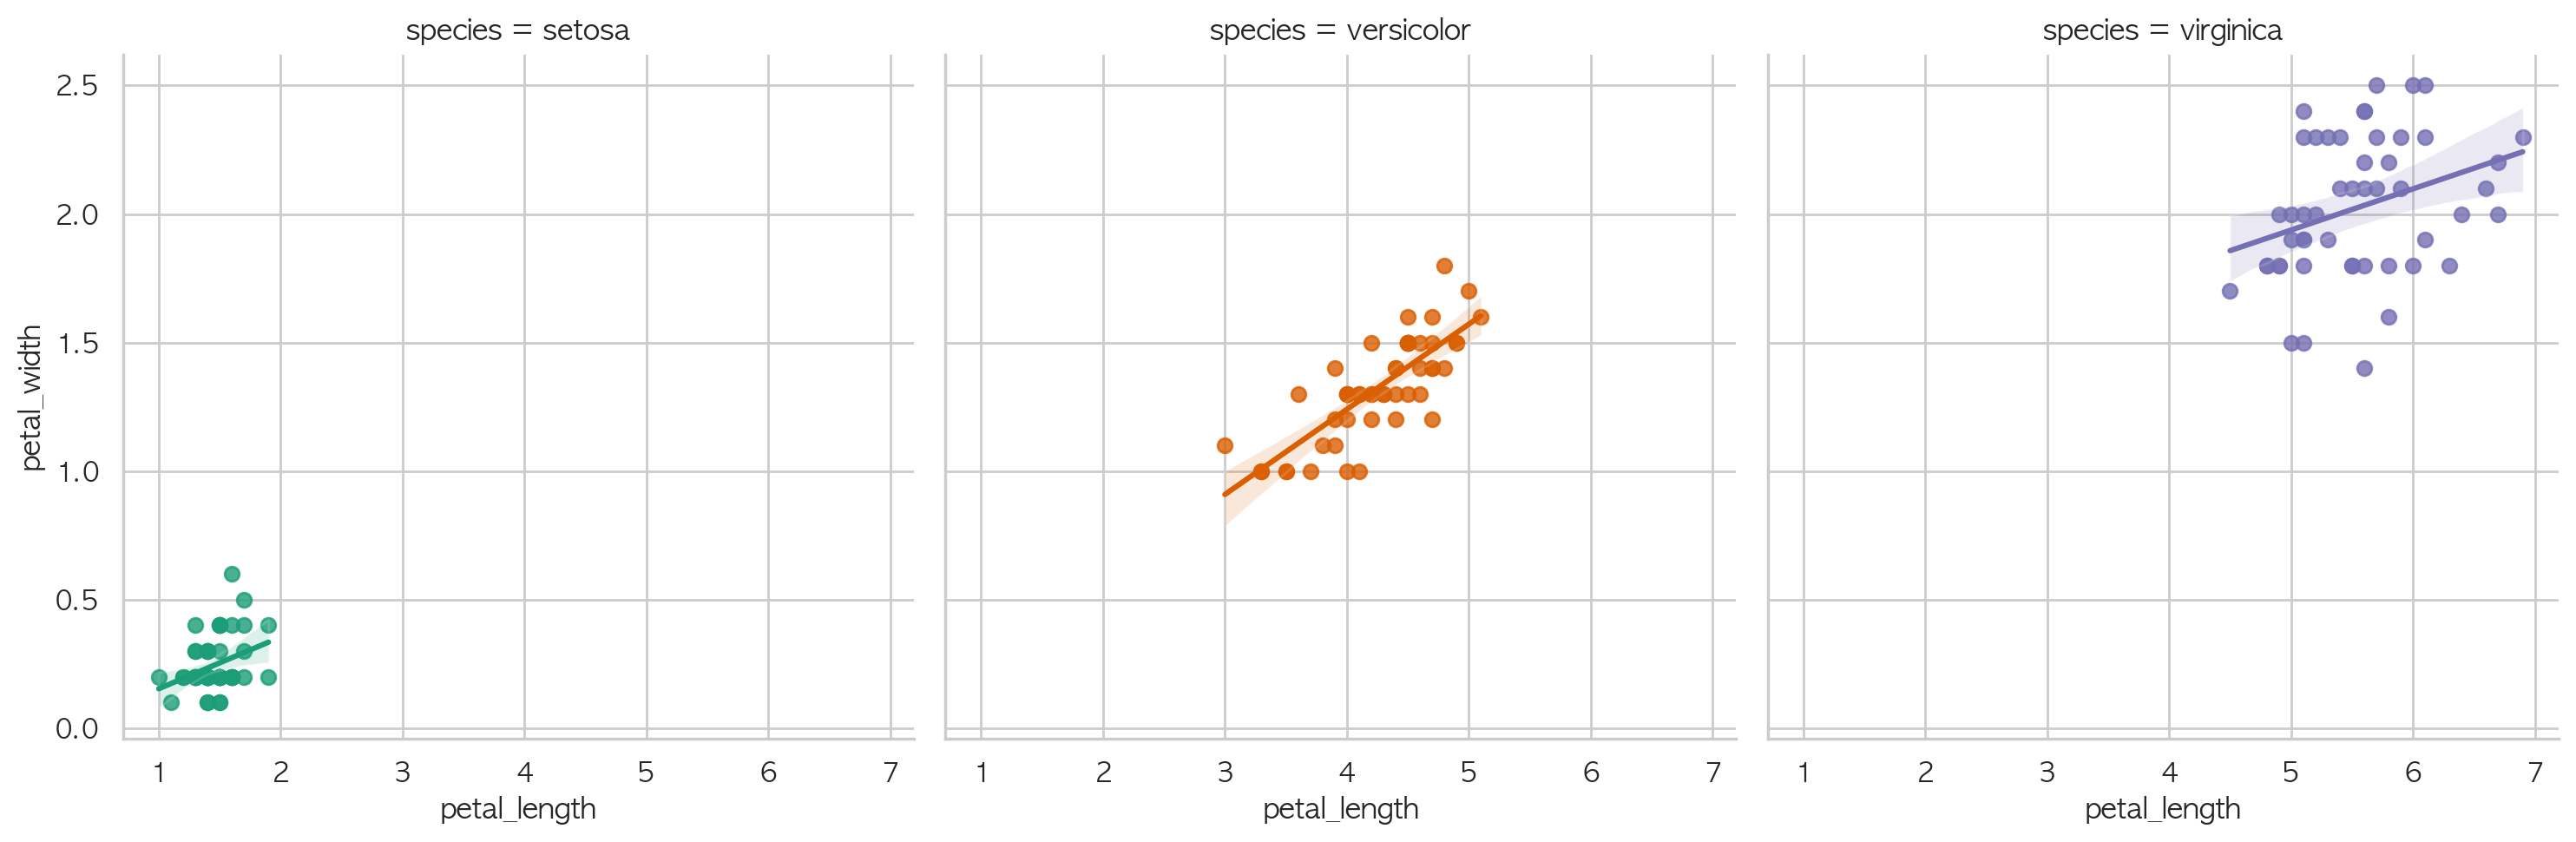

In [149]:
# 종별 회귀그래프
sns.lmplot(data=iris, x='petal_length', y='petal_width', hue='species', col='species')
plt.show()
#

## 2.4. 다중 그래프를 위한 FacetGrid 

[교안 84page FacetGrid] https://seaborn.pydata.org/tutorial/axis_grids.html#conditional-small-multiples

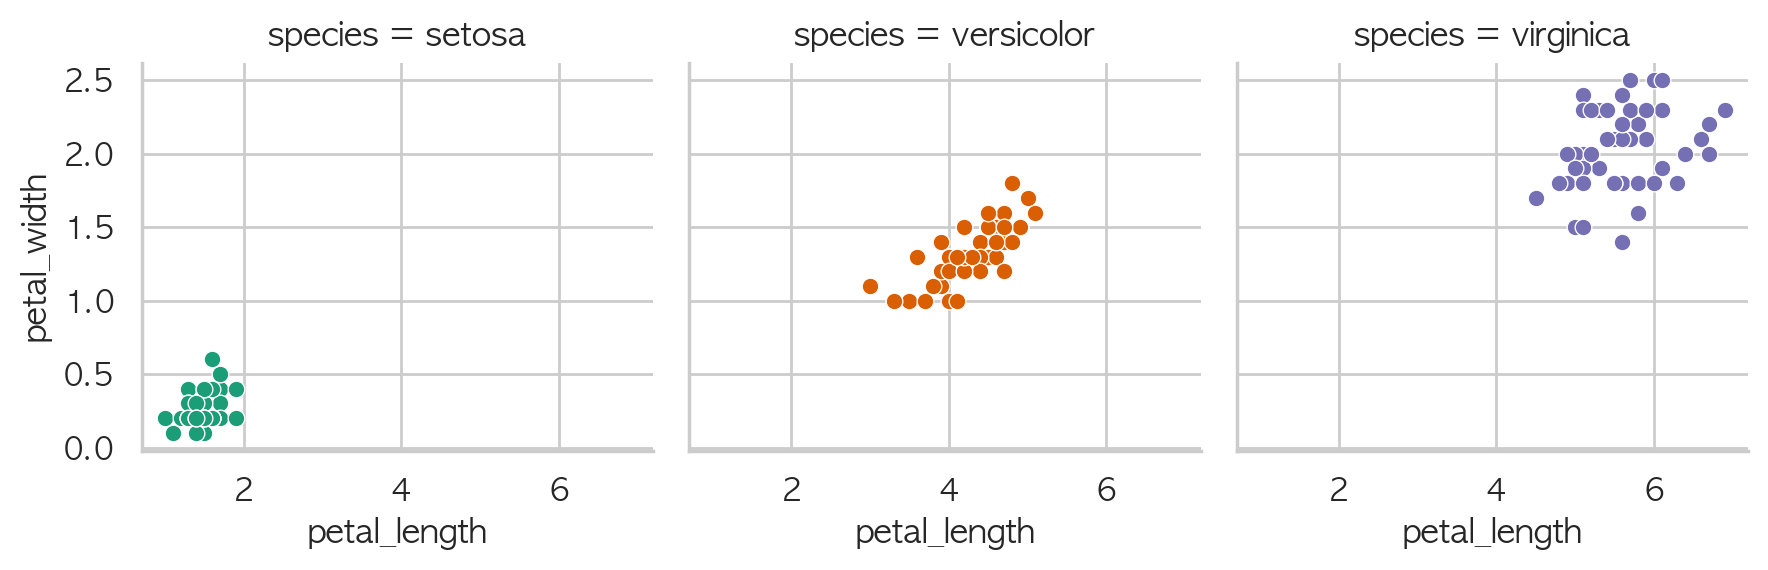

In [150]:
g = sns.FacetGrid(iris, col='species', hue='species')
g.map(sns.scatterplot,'petal_length','petal_width')

plt.show()

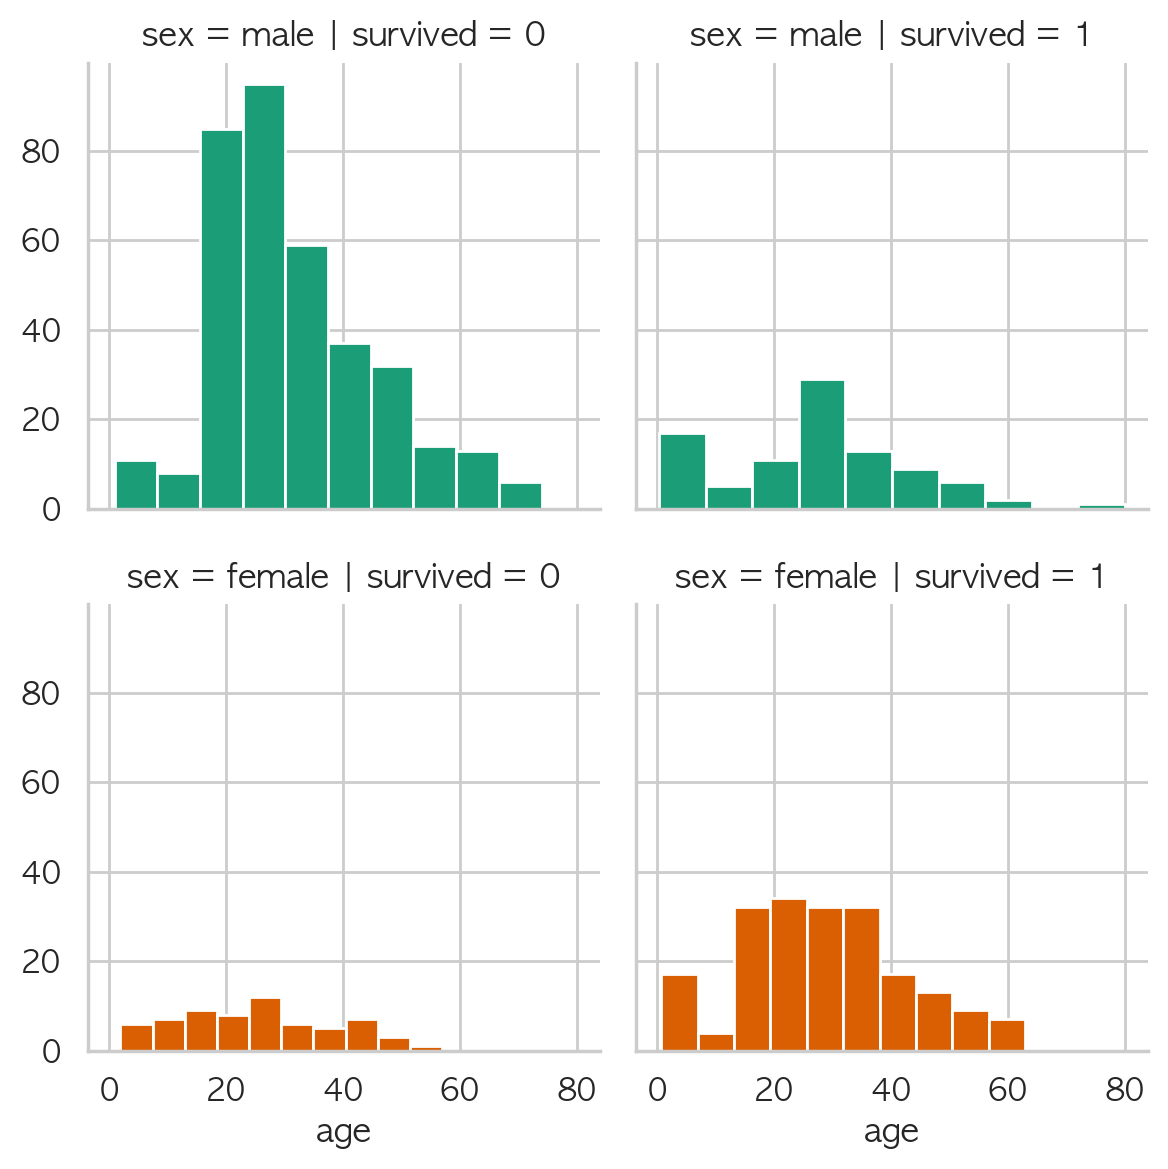

In [153]:
g = sns.FacetGrid(titanic, col='survived', hue='sex', row='sex')
g.map(plt.hist,'age')

plt.show()